# **Fundamentos de analítica II | Solución Taller 1** 

### Universidad ICESI | Maestria en Ciencia de Datos

#### Presentado por: 
- Daniel Castaño 
- Fernando Bravo

## **0. Contexto del negocio e identificación del problema**

#### Contexto del negocio:
Una empresa aseguradora en salud está presentando altos costos dados por complicaciones de pacientes que anteriormente habían sido marcados con ciertas enfermedades, cuya complicación puede aumentar tanto el costo (en casi 15 veces) como la preocupación del paciente. La primera enfermedad que han decidido estudiar estratégicamente es la Hipertensión Arterial (HTA). Dado esto, la empresa requiere mantener un control de estos pacientes, haciendo demanda inducida, seguimiento periódico, adopción de estrategias médicas, entre otras, que permitan evitar que se llegue a alguna complicación.
Realizar esto para más de 200.000 pacientes identificados con esta enfermedad es algo muy costoso, es entonces necesario priorizarlos tratando de predecir cuáles serían los pacientes que llegarán a presentar alguna complicación en los siguientes 6 meses.

#### Problema de negocio:
La empresa nos ha contratado para que construyamos un modelo predictivo que permita estimar la probabilidad de que un paciente diagnosticado con **HTA** presente una complicación en los próximos 6 meses.

## **1. Carga de paquetes**

In [365]:
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os.path as osp 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder
)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
set_config(display="diagram")
#from LDATransformer import LDATransformer
from sklearn.experimental import enable_iterative_imputer  # Importante para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
#!pip install pyarrow
#!pip install scikit-optimize

## **2. Carga de datos**

In [366]:
## Cargo mi diccionario de variables para tenerlo a modo de consulta
diccionario =pd.read_excel("Diccionario.xlsx")
diccionario

,Campo,Descripción
0,GENERO,Genero Usuario
1,ESTADO_CIVIL,Estado_Civil Usuario
2,EDAD,Edad Usuario
3,GRUPO_ETAREO,Grupo_Etareo Usuario
4,TipoAfiliado,Tipo de afiliación
...,...,...
78,HOSPITALIZACION,Cantidad De Hospitalizaciones
79,SERVICIOS,Cantidad De Numero De Autorizaciones De Servic...
80,MEDICAMENTOS,Cantidad De Numero De Autorizaciones De Medica...
81,Antiguedad_paciente,Antiguedadpaciente Usuario


In [367]:
## Carga del conjunto de datos
data = pd.read_parquet("df_train.parquet")
data.head()

,GENERO,ESTADO_CIVIL,EDAD,GRUPO_ETAREO,TipoAfiliado,Estrato,TSISTOLICA,TDIASTOLICA,ANTIHIPERTENSIVOS,AEI,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO_FAMILIAR,HIPERTENSION_FAMILIAR,DIABETES_FAMILIAR,CORONARIOS_FAMILIAR,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL_FAMILIAR,EXFUMADOR,FUMADOR,FECHA_ULTIMA_CITA,ALBUMINA,FECHA_ALBUMINA_LAB,ALBUMINURIA,FECHA_ALBUMINURIA_LAB,ALBUMINURIA24,FECHA_ALBUMINURIA24_LAB,COLESTEROL_TOTAL,FECHA_COLESTEROL_TOTAL_LAB,CREATININA_24,FECHA_CREATININA_24_LAB,CREATININA_DEPURACION,FECHA_CREATININA_DEPURACION_LAB,CREATININA_EN_SUERO_ORINA_OTROS,FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB,FOSFORO,FECHA_FOSFORO_LAB,HDL,FECHA_HDL_LAB,HEMOGLOBINA,FECHA_HEMOGLOBINA_LAB,HEMOGLOBINA_GLICOSILADA,FECHA_HEMOGLOBINA_GLICOSILADA_LAB,LDL,FECHA_LDL_LAB,PROTEINURIA,FECHA_PROTEINURIA_LAB,PTH,FECHA_PTH_LAB,RELACION_ALBUMINURIA_CREATINURIA,FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB,TRIGLICERIDOS,FECHA_TRIGLICERIDOS_LAB,UROANALISIS,FECHA_UROANALISIS_LAB,CMes_6,CMes_5,CMes_4,CMes_3,CMes_2,CMes_1,SMes_6,SMes_5,SMes_4,SMes_3,SMes_2,SMes_1,MMes_6,MMes_5,MMes_4,MMes_3,MMes_2,MMes_1,FECHA_CERO,Target,RIESGOS,IV_NIVEL,HOSPI_NO_QUIRURGICA,CANTIDAD_URGENCIAS,HOSPITALIZACION,SERVICIOS,MEDICAMENTOS,Antiguedad_paciente,Tiempo_Ultima_cita
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
126581,F,SO,74.0,70 a 74 años,Beneficiario,1,160,100,NO,SI,0,0,0,0,0,0,0,None,None,None,None,None,1,20221103,None,None,1,20221103,None,None,None,None,1,20221103,None,None,1,20221103,1,20221103,1,20221124,1,20221103,None,None,None,None,1,20221103,1,20221103,1,20221103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20221201,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.998631,52.914442
155815,M,CA,65.0,65 a 69 años,Cotizante,1,130,90,SI,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20190301,None,None,1,20190301,None,None,None,None,1,20190301,None,None,1,20190301,1,20200710,None,None,1,20190301,None,None,None,None,1,20190301,1,20190301,1,20190301,0.0,1560.0,6820.0,0.0,3990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,19.841205,52.914442
108357,F,SO,67.0,65 a 69 años,Cotizante,1,120,80,SI,SI,0,1,1,0,0,0,0,0,0,20220217,None,None,1,20220928,None,None,1,20220927,None,None,None,None,1,20221111,None,None,1,20220927,1,20221111,1,20220928,None,None,None,None,None,None,1,20220928,1,20220927,1,20221111,4860.0,4860.0,0.0,5250.0,5250.0,5250.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.501711,0.785763
74673,F,SO,43.0,19 a 44 años,Beneficiario,1,130,80,NO,SI,0,0,1,1,0,0,0,0,0,20220212,None,None,1,20210324,None,None,1,20220307,None,None,None,None,1,20220307,None,None,1,20220307,1,20220307,None,None,None,None,None,None,None,None,1,20210324,1,20220307,1,20210324,0.0,0.0,21380.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,10.568104,0.799452
217037,M,CA,66.0,65 a 69 años,Beneficiario,1,125,80,NO,NO,0,0,0,0,1,0,0,0,0,20220121,None,None,None,None,None,None,1,20220831,None,None,None,None,1,20220831,None,None,1,20220831,1,20181108,None,None,1,20200529,None,None,None,None,None,None,1,20220831,1,20190523,0.0,0.0,0.0,9877.0,9877.0,9877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,19.383984,0.859685


In [368]:
pd.set_option('display.max_columns', None)
data.head(10)

,GENERO,ESTADO_CIVIL,EDAD,GRUPO_ETAREO,TipoAfiliado,Estrato,TSISTOLICA,TDIASTOLICA,ANTIHIPERTENSIVOS,AEI,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO_FAMILIAR,HIPERTENSION_FAMILIAR,DIABETES_FAMILIAR,CORONARIOS_FAMILIAR,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL_FAMILIAR,EXFUMADOR,FUMADOR,FECHA_ULTIMA_CITA,ALBUMINA,FECHA_ALBUMINA_LAB,ALBUMINURIA,FECHA_ALBUMINURIA_LAB,ALBUMINURIA24,FECHA_ALBUMINURIA24_LAB,COLESTEROL_TOTAL,FECHA_COLESTEROL_TOTAL_LAB,CREATININA_24,FECHA_CREATININA_24_LAB,CREATININA_DEPURACION,FECHA_CREATININA_DEPURACION_LAB,CREATININA_EN_SUERO_ORINA_OTROS,FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB,FOSFORO,FECHA_FOSFORO_LAB,HDL,FECHA_HDL_LAB,HEMOGLOBINA,FECHA_HEMOGLOBINA_LAB,HEMOGLOBINA_GLICOSILADA,FECHA_HEMOGLOBINA_GLICOSILADA_LAB,LDL,FECHA_LDL_LAB,PROTEINURIA,FECHA_PROTEINURIA_LAB,PTH,FECHA_PTH_LAB,RELACION_ALBUMINURIA_CREATINURIA,FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB,TRIGLICERIDOS,FECHA_TRIGLICERIDOS_LAB,UROANALISIS,FECHA_UROANALISIS_LAB,CMes_6,CMes_5,CMes_4,CMes_3,CMes_2,CMes_1,SMes_6,SMes_5,SMes_4,SMes_3,SMes_2,SMes_1,MMes_6,MMes_5,MMes_4,MMes_3,MMes_2,MMes_1,FECHA_CERO,Target,RIESGOS,IV_NIVEL,HOSPI_NO_QUIRURGICA,CANTIDAD_URGENCIAS,HOSPITALIZACION,SERVICIOS,MEDICAMENTOS,Antiguedad_paciente,Tiempo_Ultima_cita
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
126581,F,SO,74.0,70 a 74 años,Beneficiario,1,160,100,NO,SI,0,0,0,0,0,0,0,None,None,None,None,None,1,20221103,None,None,1,20221103,None,None,None,None,1,20221103,None,None,1,20221103,1,20221103,1,20221124,1,20221103,None,None,None,None,1,20221103,1,20221103,1,20221103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20221201,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.998631,52.914442
155815,M,CA,65.0,65 a 69 años,Cotizante,1,130,90,SI,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20190301,None,None,1,20190301,None,None,None,None,1,20190301,None,None,1,20190301,1,20200710,None,None,1,20190301,None,None,None,None,1,20190301,1,20190301,1,20190301,0.0,1560.0,6820.0,0.0,3990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,19.841205,52.914442
108357,F,SO,67.0,65 a 69 años,Cotizante,1,120,80,SI,SI,0,1,1,0,0,0,0,0,0,20220217,None,None,1,20220928,None,None,1,20220927,None,None,None,None,1,20221111,None,None,1,20220927,1,20221111,1,20220928,None,None,None,None,None,None,1,20220928,1,20220927,1,20221111,4860.0,4860.0,0.0,5250.0,5250.0,5250.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.501711,0.785763
74673,F,SO,43.0,19 a 44 años,Beneficiario,1,130,80,NO,SI,0,0,1,1,0,0,0,0,0,20220212,None,None,1,20210324,None,None,1,20220307,None,None,None,None,1,20220307,None,None,1,20220307,1,20220307,None,None,None,None,None,None,None,None,1,20210324,1,20220307,1,20210324,0.0,0.0,21380.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,10.568104,0.799452
217037,M,CA,66.0,65 a 69 años,Beneficiario,1,125,80,NO,NO,0,0,0,0,1,0,0,0,0,20220121,None,None,None,None,None,None,1,20220831,None,None,None,None,1,20220831,None,None,1,20220831,1,20181108,None,None,1,20200529,None,None,None,None,None,None,1,20220831,1,20190523,0.0,0.0,0.0,9877.0,9877.0,9877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,20221201,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,19.383984,0.859685
121454,F,UL,55.0,55 a 59 años,Beneficiario,1,120,80,NO,SI,0,0,0,1,0,0,0,0,0,None,None,None,1,20220905,None,None,1,20220905,None,None,None,None,1,20220905,None,None,1,20220411,1,20201007,1,20220905,1,20181206,None,None,None,None,None,None,1,20220411,1,20180306,4320.0,0.0,0.0,0.0,1440.0,1440.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,20221201,0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,5.119781,52.914442
88202,F,VI,68.0,65 a 69 años,Cotizante,2,130,80,SI,SI,0,1,1,0,0,1,0,0,0,20220202,1,20180428,1,20220411,None,None,1,20220410,None,None,None,None,1,20220410,1,20210529,1,20220410,1,20220410,1,20220411,None,None,1,20180520,1,20210529,1,20220411,1,20220410,1,20220411,17220.0

## **3. Entendimiento y preparación de datos:** (EDA)

#### **3.1 Exploración de los datos**

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160396 entries, 126581 to 224138
Data columns (total 83 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   GENERO                                      160396 non-null  object 
 1   ESTADO_CIVIL                                160396 non-null  object 
 2   EDAD                                        160396 non-null  float64
 3   GRUPO_ETAREO                                160396 non-null  object 
 4   TipoAfiliado                                160392 non-null  object 
 5   Estrato                                     160396 non-null  object 
 6   TSISTOLICA                                  135371 non-null  object 
 7   TDIASTOLICA                                 135306 non-null  object 
 8   ANTIHIPERTENSIVOS                           160396 non-null  object 
 9   AEI                                         160396 non-null  obje

In [370]:
## transformación de variables
data['TSISTOLICA'] = data['TSISTOLICA'].astype(float)
data['TDIASTOLICA'] = data['TDIASTOLICA'].astype(float)

In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160396 entries, 126581 to 224138
Data columns (total 83 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   GENERO                                      160396 non-null  object 
 1   ESTADO_CIVIL                                160396 non-null  object 
 2   EDAD                                        160396 non-null  float64
 3   GRUPO_ETAREO                                160396 non-null  object 
 4   TipoAfiliado                                160392 non-null  object 
 5   Estrato                                     160396 non-null  object 
 6   TSISTOLICA                                  135371 non-null  float64
 7   TDIASTOLICA                                 135306 non-null  float64
 8   ANTIHIPERTENSIVOS                           160396 non-null  object 
 9   AEI                                         160396 non-null  obje

In [372]:
# Numerical variables:
num_cols = ['EDAD','TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4', 'CMes_3', 'CMes_2', 
            'CMes_1', 'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3', 'SMes_2', 'SMes_1', 'MMes_6', 'MMes_5',
            'MMes_4', 'MMes_3', 'MMes_2', 'MMes_1', 'IV_NIVEL', 'RIESGOS', 'HOSPI_NO_QUIRURGICA', 
            'CANTIDAD_URGENCIAS', 'HOSPITALIZACION', 'SERVICIOS', 'MEDICAMENTOS', 'Antiguedad_paciente',
            'Tiempo_Ultima_cita']

# Categorical variables:
cat_cols = ['GENERO', 'ESTADO_CIVIL', 'TipoAfiliado', 'ANTIHIPERTENSIVOS', 'AEI',
            'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR', 'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR',
            'CORONARIOS_FAMILIAR', 'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'EXFUMADOR',
            'FUMADOR',  'ALBUMINA', 'ALBUMINURIA','ALBUMINURIA24','COLESTEROL_TOTAL', 'CREATININA_24', 'CREATININA_DEPURACION',
            'CREATININA_EN_SUERO_ORINA_OTROS', 'FOSFORO',  'HDL','HEMOGLOBINA',  
            'HEMOGLOBINA_GLICOSILADA', 'LDL', 'PROTEINURIA', 'PTH',  
            'RELACION_ALBUMINURIA_CREATINURIA', 'TRIGLICERIDOS', 'UROANALISIS' ]
            
date_cols = ['FECHA_ALBUMINA_LAB','FECHA_ALBUMINURIA_LAB','FECHA_COLESTEROL_TOTAL_LAB',
            'FECHA_ALBUMINURIA24_LAB','FECHA_CREATININA_24_LAB','FECHA_CREATININA_DEPURACION_LAB',
            'FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB', 'FECHA_FOSFORO_LAB','FECHA_HDL_LAB',
            'FECHA_HEMOGLOBINA_LAB','FECHA_HEMOGLOBINA_GLICOSILADA_LAB','FECHA_LDL_LAB',
            'FECHA_LDL_LAB', 'FECHA_PROTEINURIA_LAB', 'FECHA_PTH_LAB', 
            'FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB', 'FECHA_TRIGLICERIDOS_LAB',
            'FECHA_UROANALISIS_LAB','FECHA_ULTIMA_CITA']

# Ordinal variables
ord_cols = ['GRUPO_ETAREO','Estrato']

In [373]:
print(f"[Valores únicos en {len(cat_cols)} Variables Categoricas]\n")

for cat_col in cat_cols:
    print("* {} : {} Unique Values =>".format(cat_col, data[cat_col].nunique()), data[cat_col].unique())

[Valores únicos en 31 Variables Categoricas]

* GENERO : 2 Unique Values => ['F' 'M']
* ESTADO_CIVIL : 5 Unique Values => ['SO' 'CA' 'UL' 'VI' 'SE']
* TipoAfiliado : 3 Unique Values => ['Beneficiario' 'Cotizante' 'Falta Descripción Estado Afiliado' None]
* ANTIHIPERTENSIVOS : 2 Unique Values => ['NO' 'SI']
* AEI : 2 Unique Values => ['SI' 'NO']
* CANCER_MAMA_FAMILIAR : 2 Unique Values => ['0' '1']
* CANCER_OTRO_SITIO_FAMILIAR : 2 Unique Values => ['0' '1']
* HIPERTENSION_FAMILIAR : 2 Unique Values => ['0' '1']
* DIABETES_FAMILIAR : 2 Unique Values => ['0' '1']
* CORONARIOS_FAMILIAR : 2 Unique Values => ['0' '1']
* CEREBRAL_FAMILIAR : 2 Unique Values => ['0' '1']
* ENFERMEDAD_RENAL_FAMILIAR : 2 Unique Values => ['0' '1']
* EXFUMADOR : 1 Unique Values => [None '0']
* FUMADOR : 1 Unique Values => [None '0']
* ALBUMINA : 1 Unique Values => [None '1']
* ALBUMINURIA : 1 Unique Values => ['1' None]
* ALBUMINURIA24 : 1 Unique Values => [None '1']
* COLESTEROL_TOTAL : 1 Unique Values => ['1' No

In [374]:
print(f"[Valores Unicos en {len(ord_cols)} Variables ordinales]\n")

for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, data[ord_col].nunique()), data[ord_col].unique())

[Valores Unicos en 2 Variables ordinales]

* GRUPO_ETAREO : 11 Unique Values => ['70 a 74 años' '65 a 69 años' '19 a 44 años' '55 a 59 años'
 '45 a 49 años' '50 a 54 años' '75 años y más' '60 a 64 años'
 '5 a 14 años' '15 a 18 años' '1 a 4 años']
* Estrato : 5 Unique Values => ['1' '2' '3' '0' '']


In [375]:
print(f"[Valores unicos en  {len(num_cols)} Variables Numéricas]\n")

for num_col in num_cols:
    print("* {} : {} Unique Values".format(num_col, data[num_col].nunique()))

[Valores unicos en  30 Variables Numéricas]

* EDAD : 105 Unique Values
* TSISTOLICA : 191 Unique Values
* TDIASTOLICA : 157 Unique Values
* CMes_6 : 19964 Unique Values
* CMes_5 : 20164 Unique Values
* CMes_4 : 20107 Unique Values
* CMes_3 : 21586 Unique Values
* CMes_2 : 22390 Unique Values
* CMes_1 : 22765 Unique Values
* SMes_6 : 42 Unique Values
* SMes_5 : 33 Unique Values
* SMes_4 : 35 Unique Values
* SMes_3 : 40 Unique Values
* SMes_2 : 38 Unique Values
* SMes_1 : 43 Unique Values
* MMes_6 : 12 Unique Values
* MMes_5 : 13 Unique Values
* MMes_4 : 13 Unique Values
* MMes_3 : 12 Unique Values
* MMes_2 : 12 Unique Values
* MMes_1 : 13 Unique Values
* IV_NIVEL : 15 Unique Values
* RIESGOS : 12 Unique Values
* HOSPI_NO_QUIRURGICA : 6 Unique Values
* CANTIDAD_URGENCIAS : 7 Unique Values
* HOSPITALIZACION : 15 Unique Values
* SERVICIOS : 119 Unique Values
* MEDICAMENTOS : 47 Unique Values
* Antiguedad_paciente : 8553 Unique Values
* Tiempo_Ultima_cita : 795 Unique Values


In [376]:
#Datos estadísticos primeras 15 variables numéricas
data[num_cols[:15]].describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

,EDAD,TSISTOLICA,TDIASTOLICA,CMes_6,CMes_5,CMes_4,CMes_3,CMes_2,CMes_1,SMes_6,SMes_5,SMes_4,SMes_3,SMes_2,SMes_1
count,160396.000000,135371.000000,135306.000000,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000
mean,64.633638,130.330189,78.261481,3.676481e+04,3.675277e+04,3.538102e+04,3.952722e+04,4.239327e+04,4.501093e+04,0.062389,0.063293,0.069615,0.073393,0.075158,0.082047
std,13.722636,765.407998,35.803540,1.703080e+05,1.744866e+05,1.664544e+05,1.699679e+05,1.821380e+05,1.937191e+05,0.779170,0.647437,0.758565,0.789580,0.805058,0.908379
min,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,46.000000,110.000000,70.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,120.000000,70.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,120.000000,80.000000,1.320000e+03,1.440000e+03,1.710000e+03,2.430000e+03,2.460000e+03,2.430000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,130.000000,80.000000,1.017000e+04,1.035000e+04,1.045500e+04,1.311000e+04,1.422000e+04,1.458000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,82.000000,140.000000,90.000000,8.363850e+04,8.451000e+04,8.505000e+04,9.764950e+04,1.068890e+05,1.129800e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,86.000000,150.000000,94.000000,1.919925e+05,1.887050e+05,1.824900e+05,2.017905e+05,2.087355e+05,2.155350e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [377]:
#Datos estadísticos últimas 15 variables numéricas
data[num_cols[15:]].describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

,MMes_6,MMes_5,MMes_4,MMes_3,MMes_2,MMes_1,IV_NIVEL,RIESGOS,HOSPI_NO_QUIRURGICA,CANTIDAD_URGENCIAS,HOSPITALIZACION,SERVICIOS,MEDICAMENTOS,Antiguedad_paciente,Tiempo_Ultima_cita
count,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000,160396.000000
mean,0.778392,0.783791,0.786927,0.880932,0.860464,0.871113,0.004670,1.671525,0.009813,0.032538,0.014707,0.425896,4.961620,10.846517,18.155484
std,0.974963,0.963032,0.950182,1.034726,0.991771,1.024506,0.211687,1.090391,0.114982,0.197070,0.241960,3.060843,4.693764,7.816486,24.372321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.834360,-0.082136
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.667351,0.804928
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.915127,0.887064
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.914442,1.215606
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,17.768652,52.914442
90%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,11.000000,22.401095,52.914442
95%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,14.000000,24.433265,52.914442


#### **Analisis Univariado**

Variables Categóricas

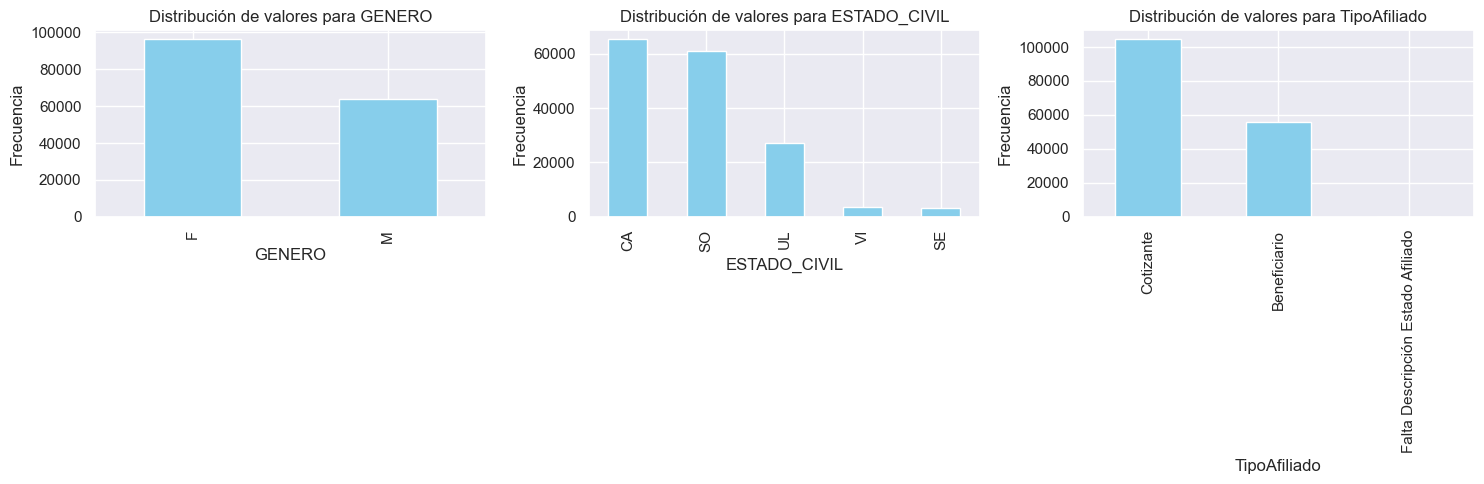

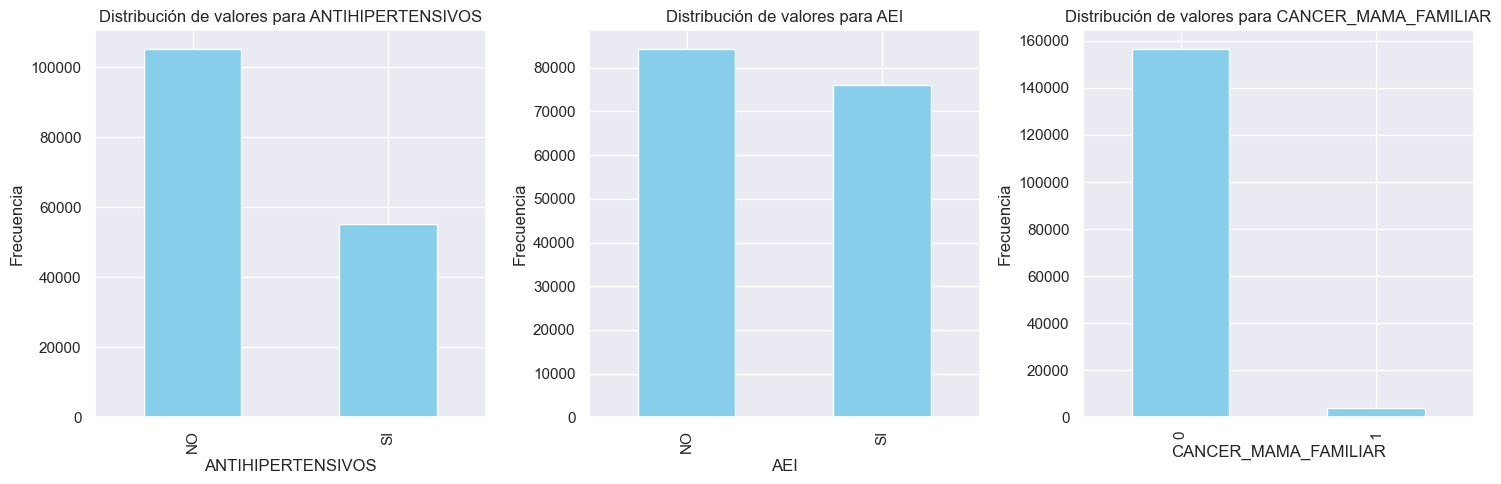

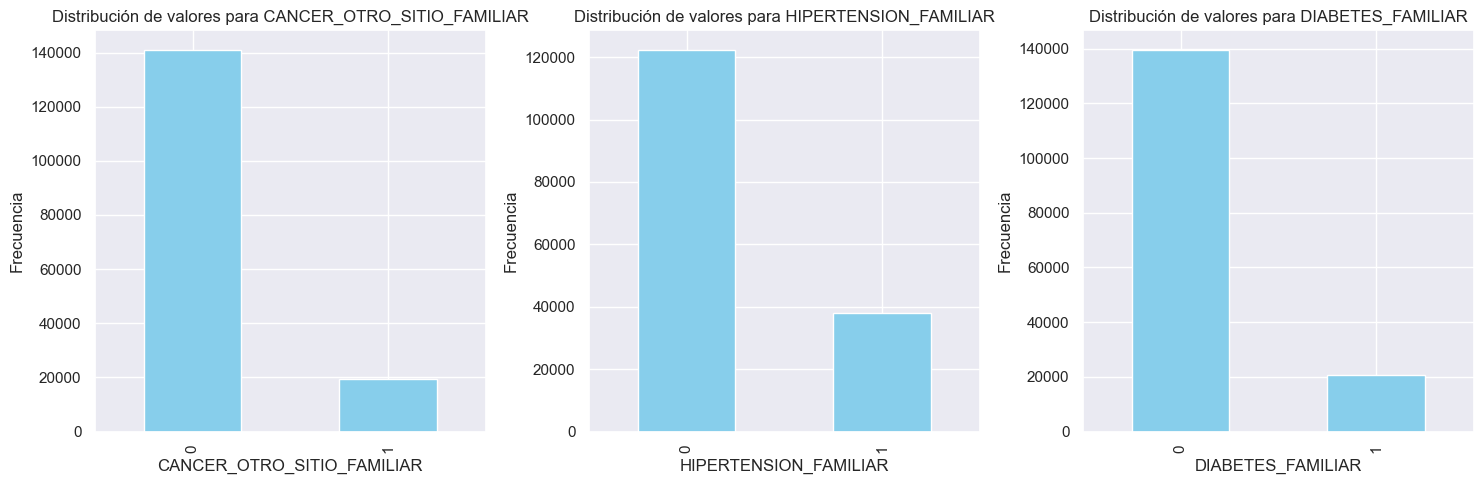

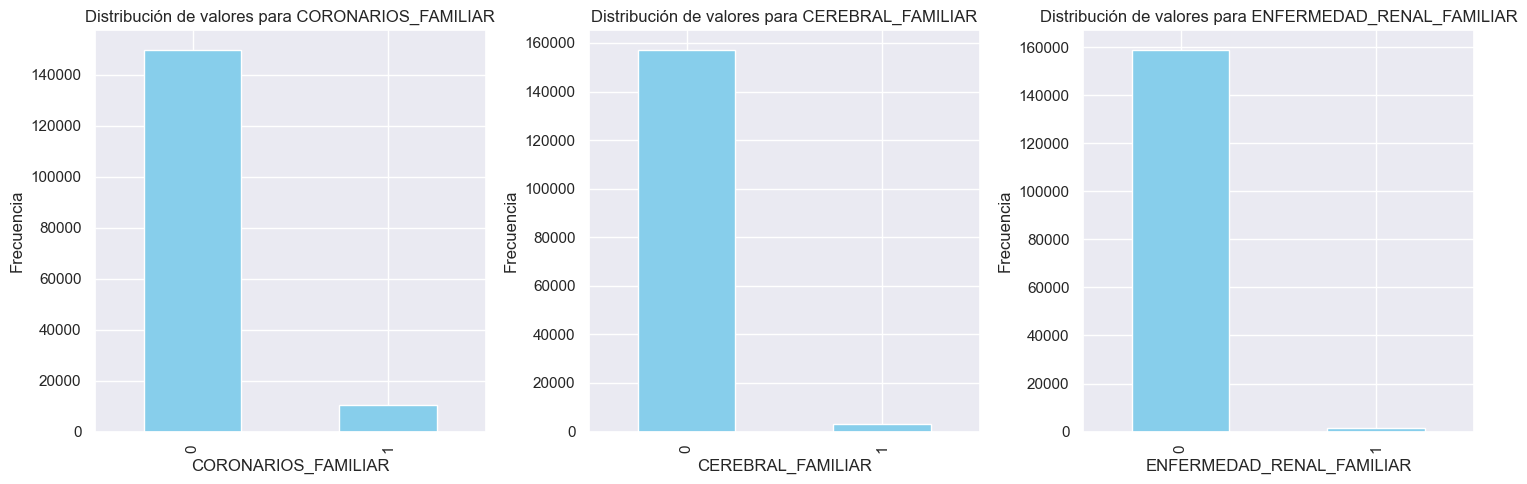

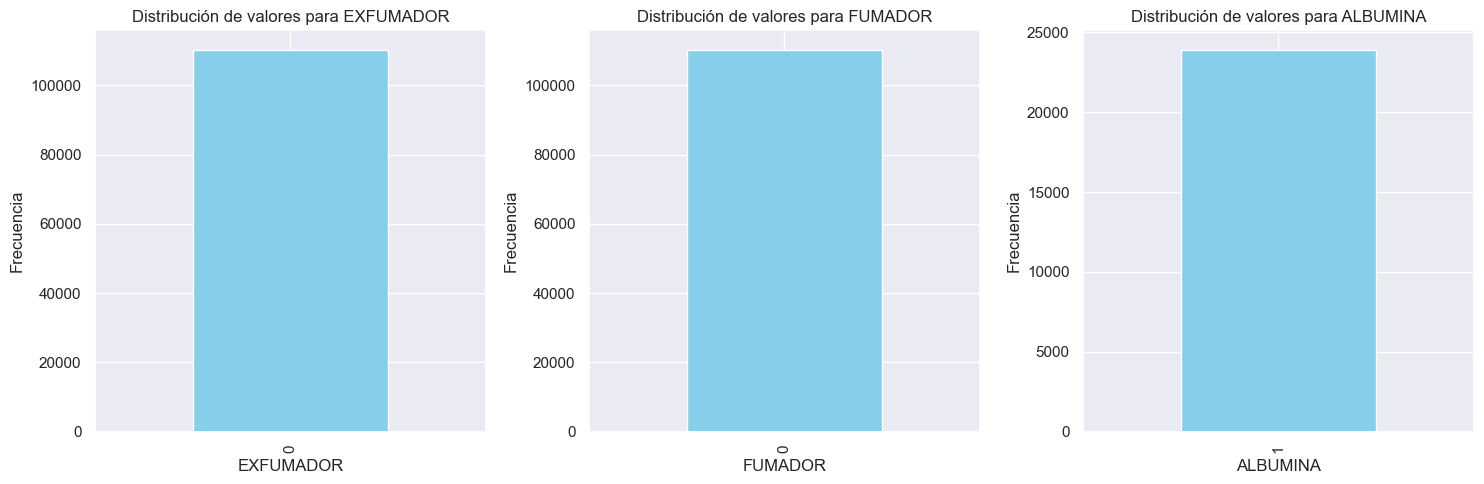

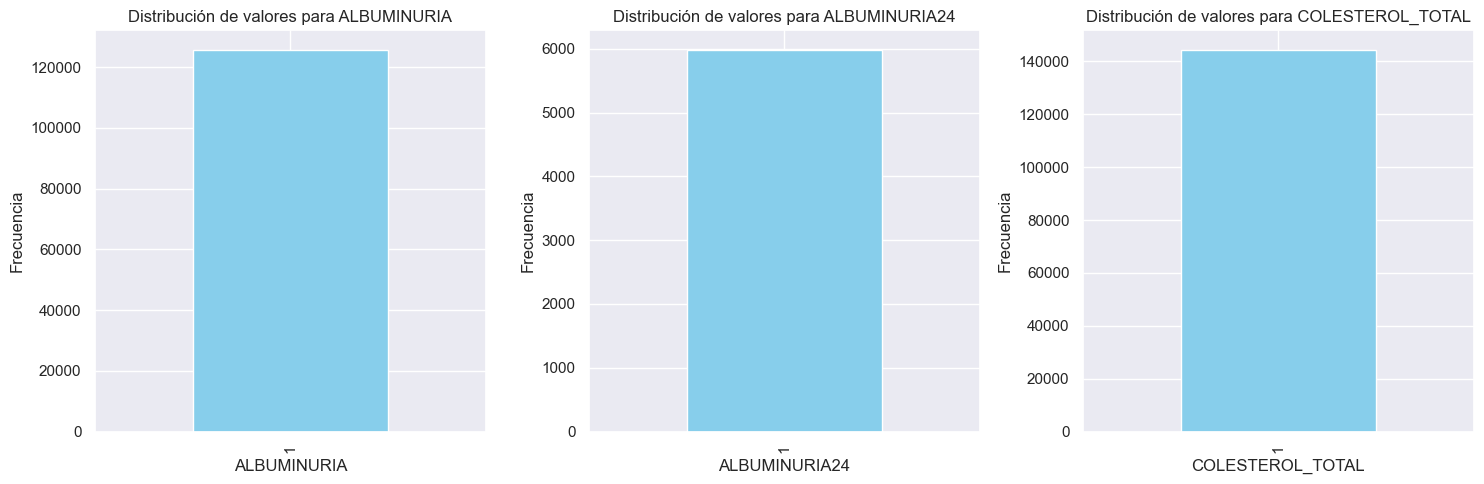

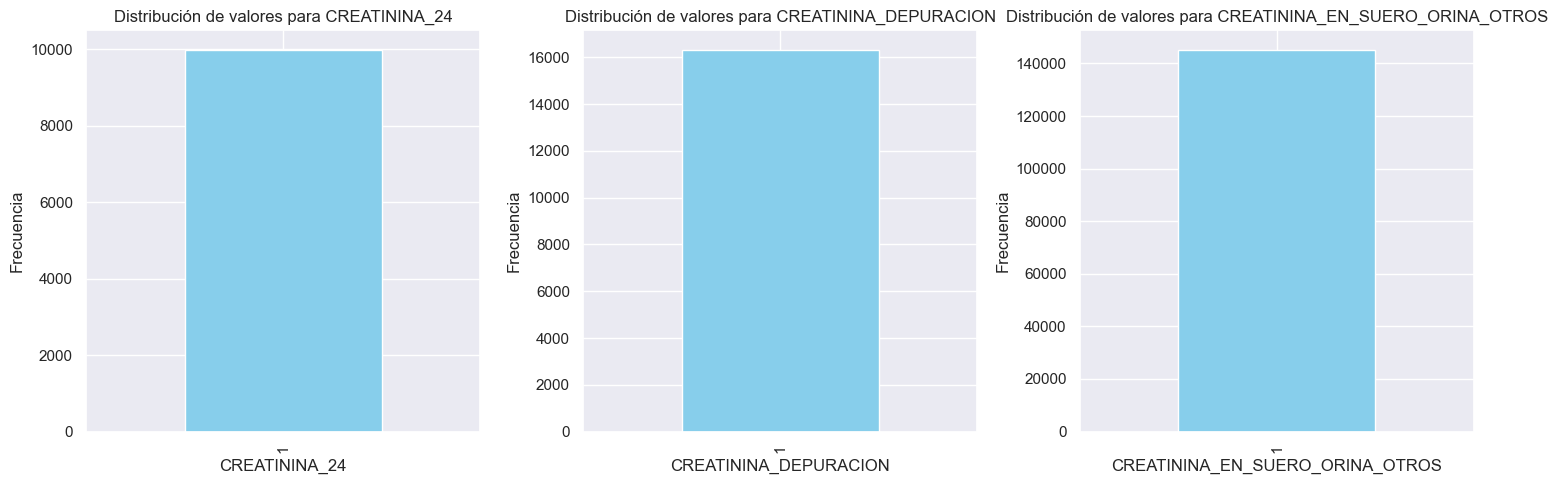

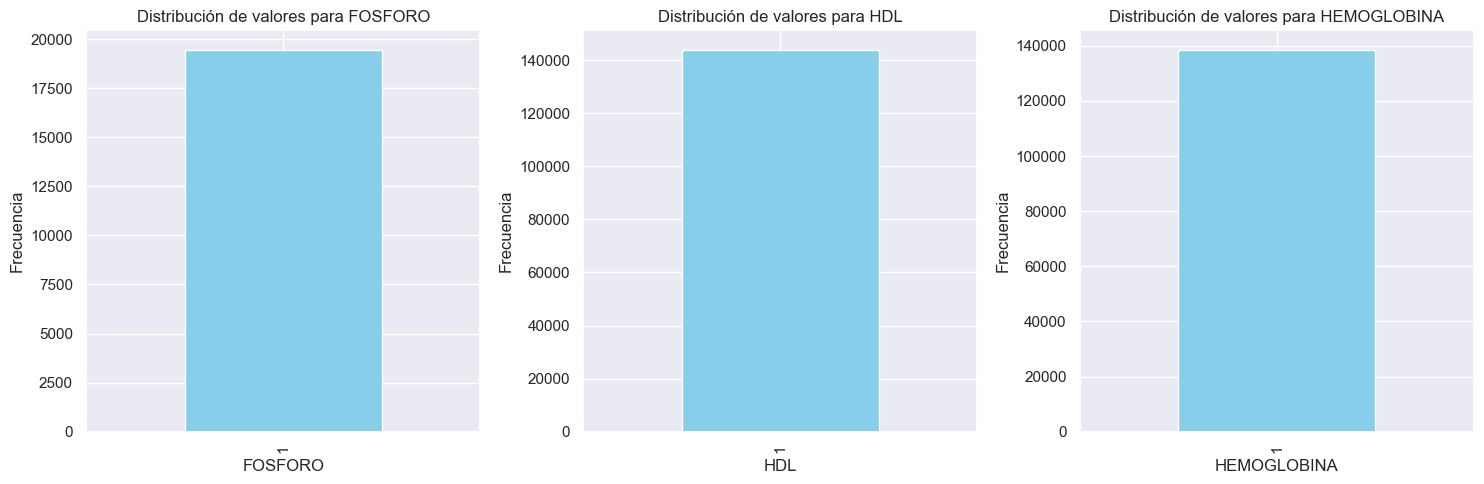

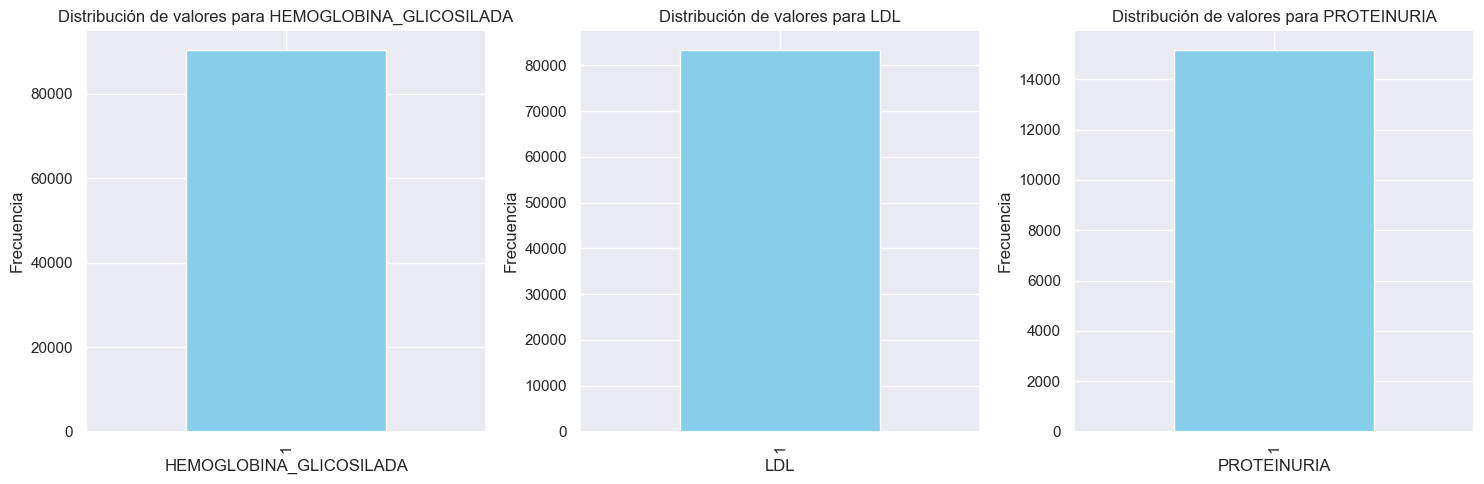

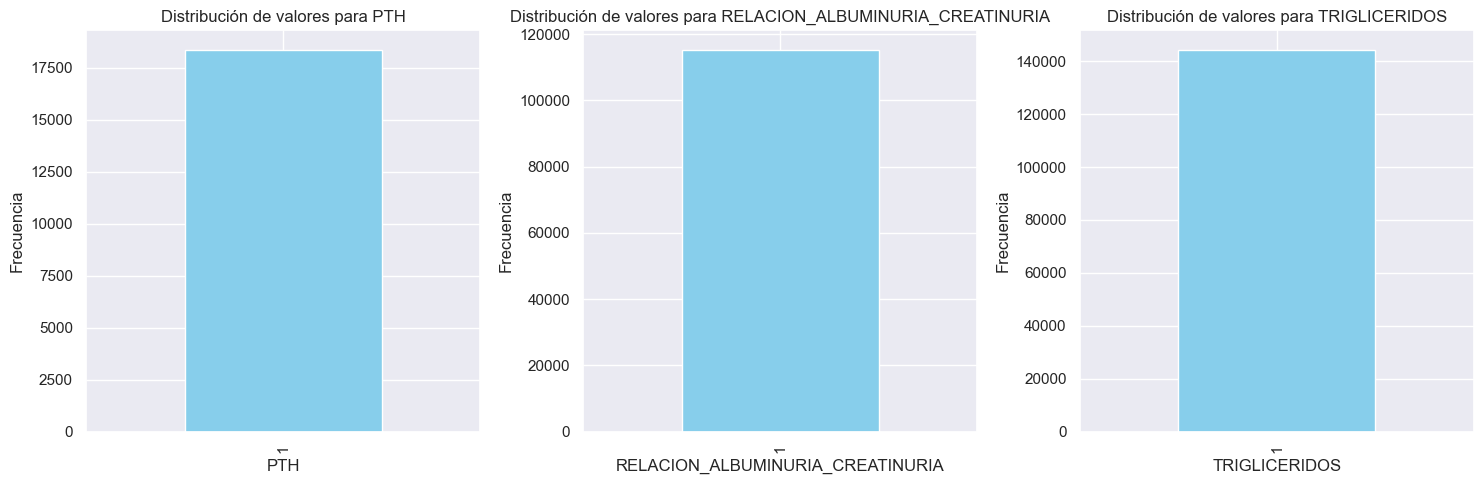

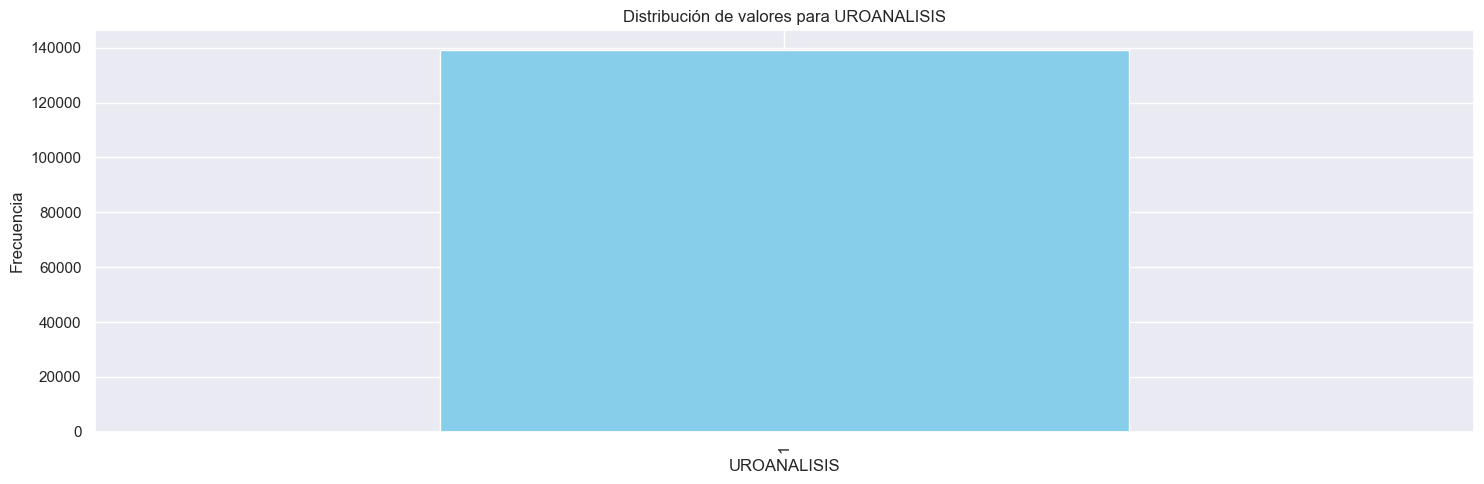

In [378]:
data_categoricas = data[cat_cols]

total_var_categoricas = len(data_categoricas.columns)

graficas_por_fila = 3


total_filas = -(-total_var_categoricas // graficas_por_fila)  


for i in range(total_filas):
    start_idx = i * graficas_por_fila
    end_idx = min((i + 1) * graficas_por_fila, total_var_categoricas)
    fig, axs = plt.subplots(1, end_idx - start_idx, figsize=(15, 5))
    if end_idx - start_idx > 1:
        axs = axs.ravel()
    else:
        axs = [axs]  
    for j, col_idx in enumerate(range(start_idx, end_idx)):
        col = data_categoricas.columns[col_idx]
        counts = data[col].value_counts()
        counts.plot(kind='bar', color='skyblue', ax=axs[j])
        axs[j].set_title(f'Distribución de valores para {col}')
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

Variables Numéricas:

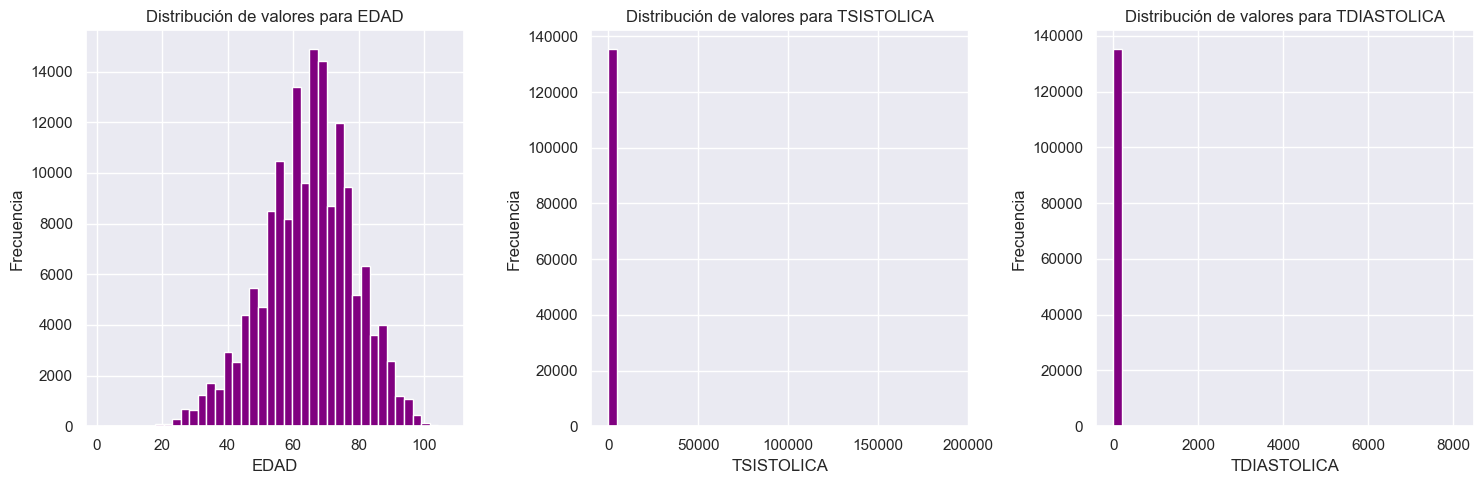

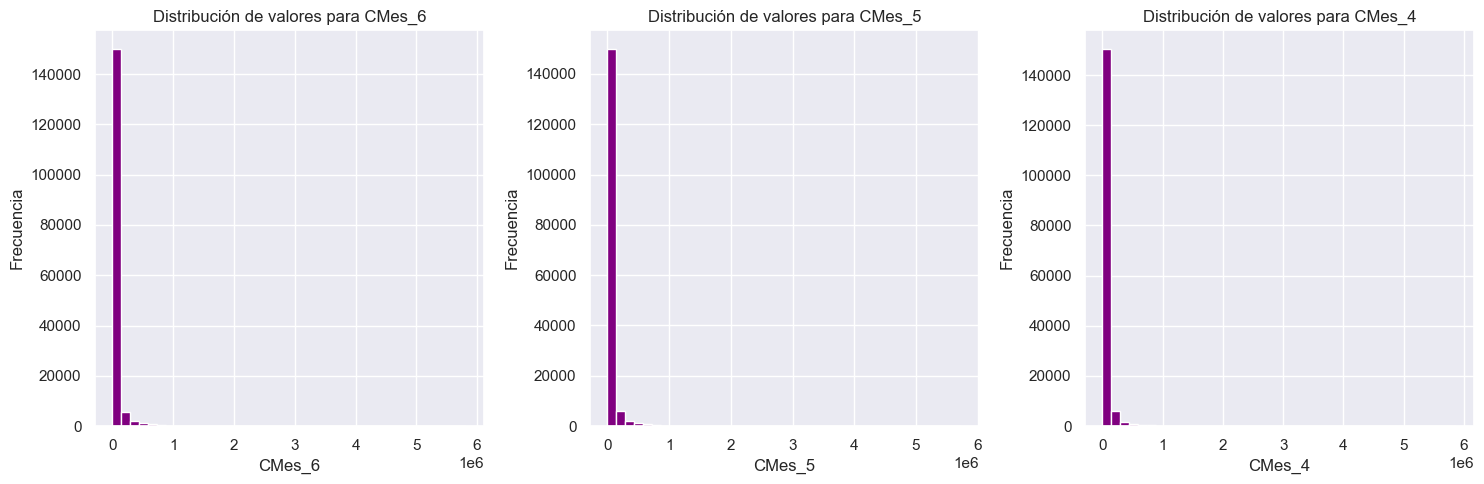

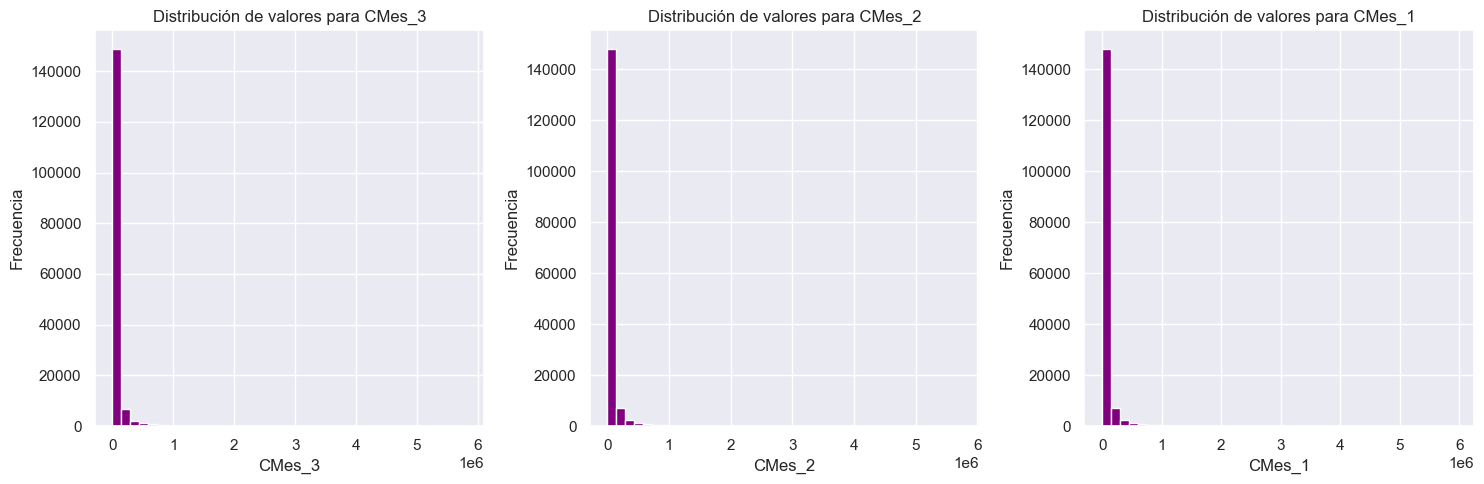

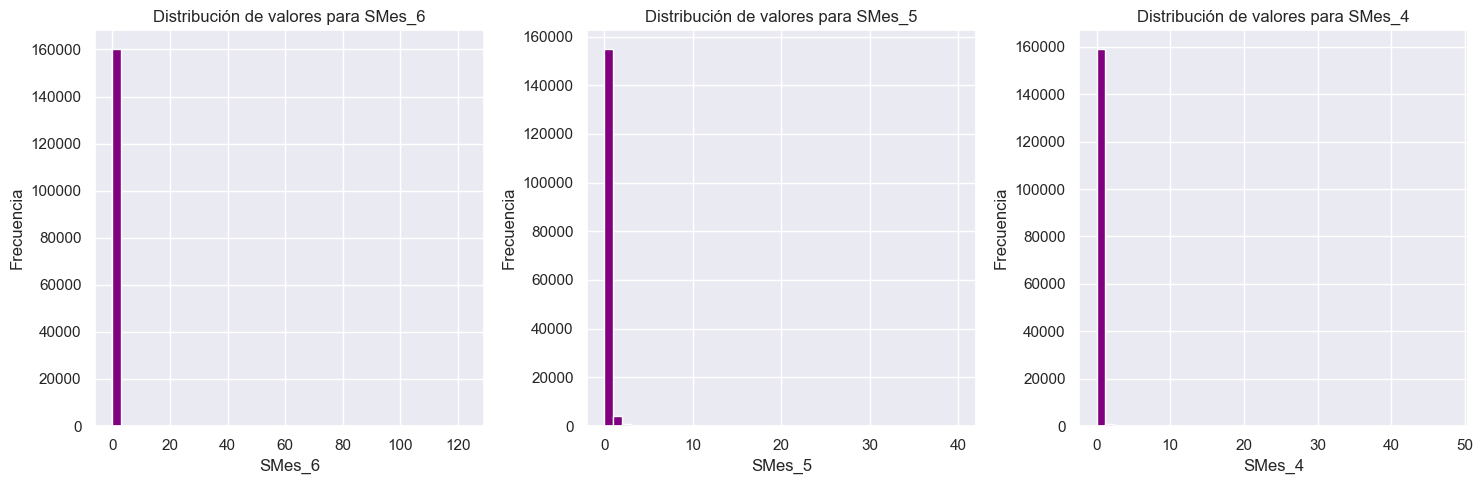

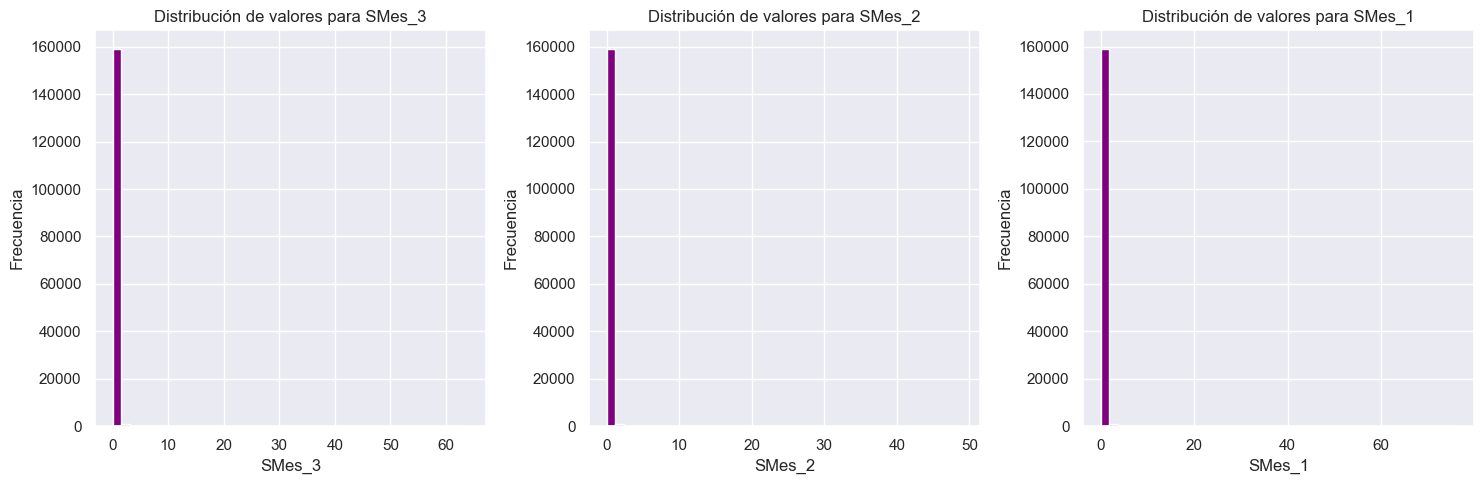

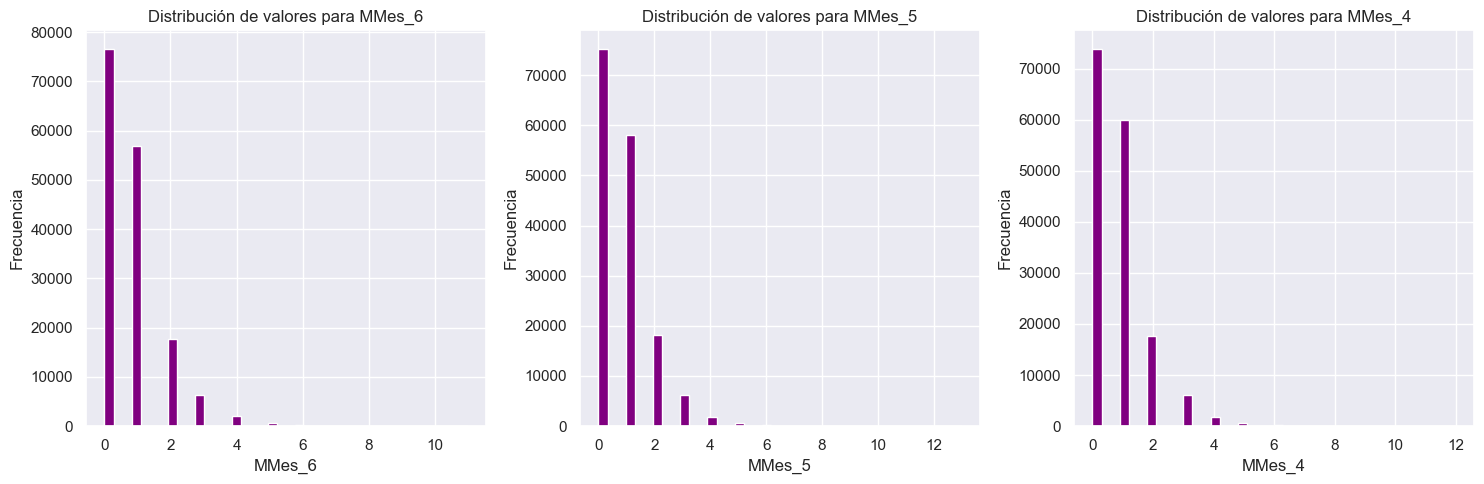

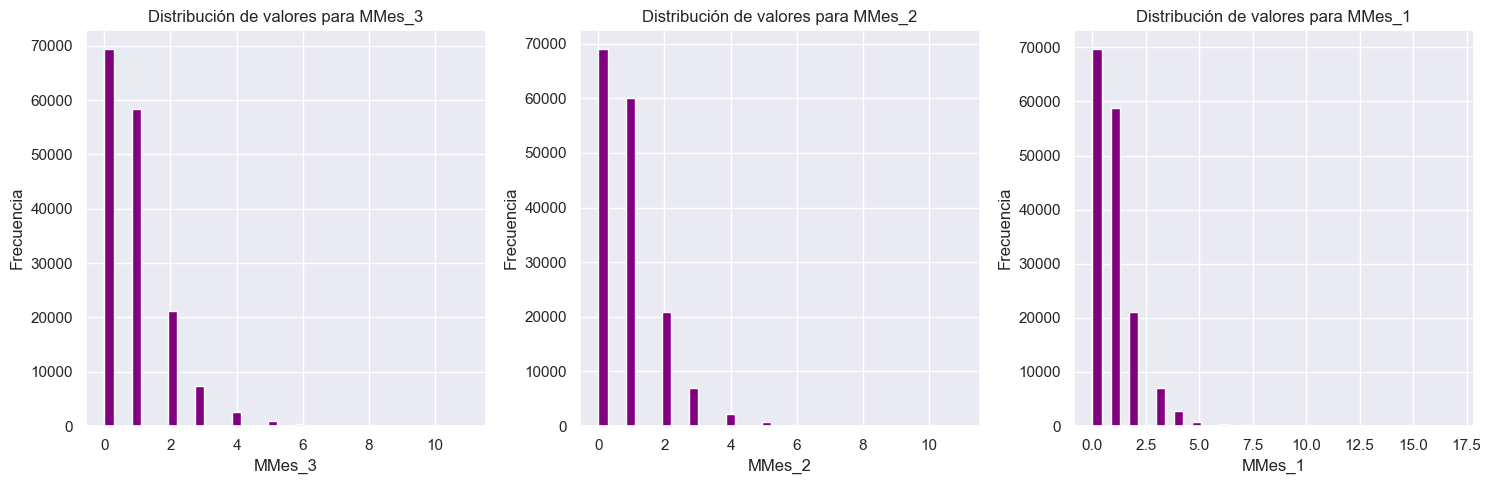

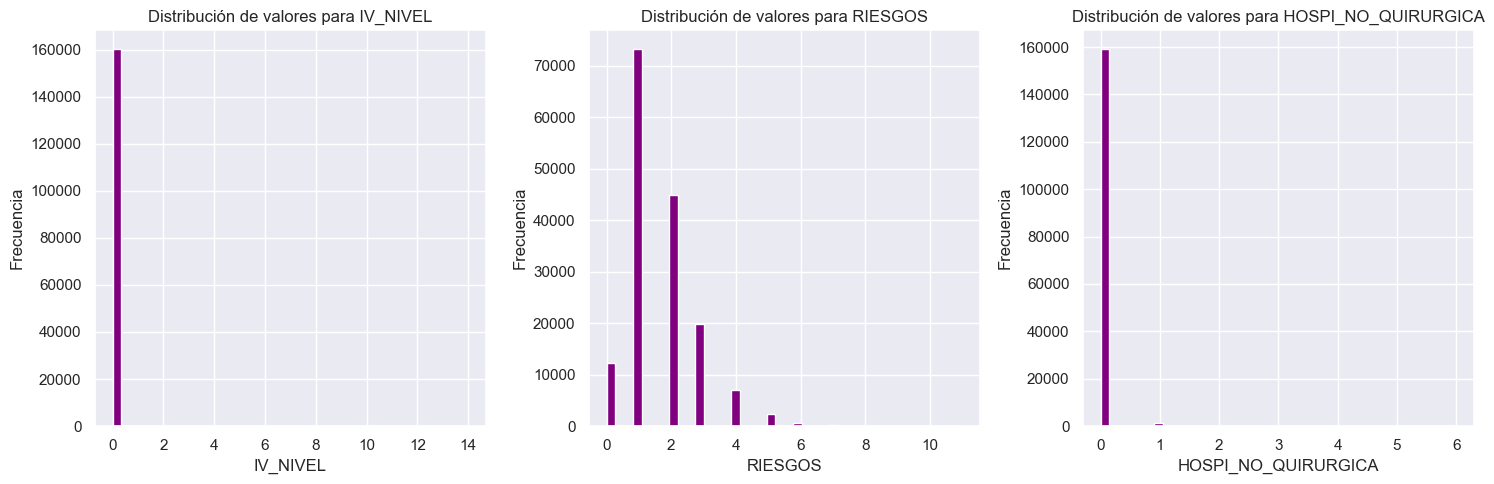

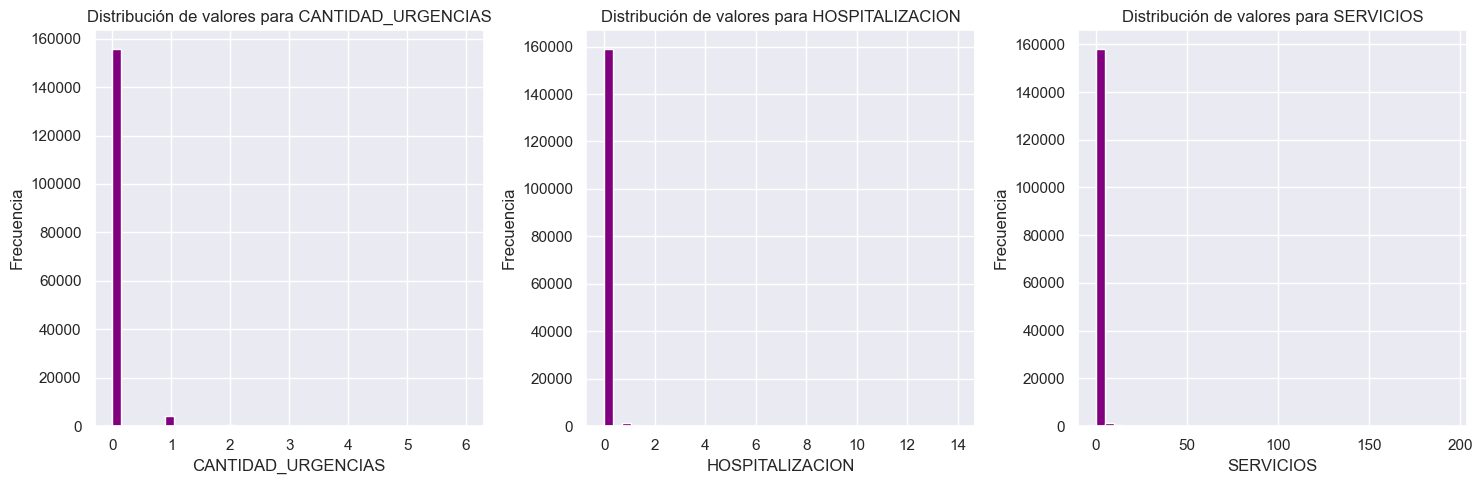

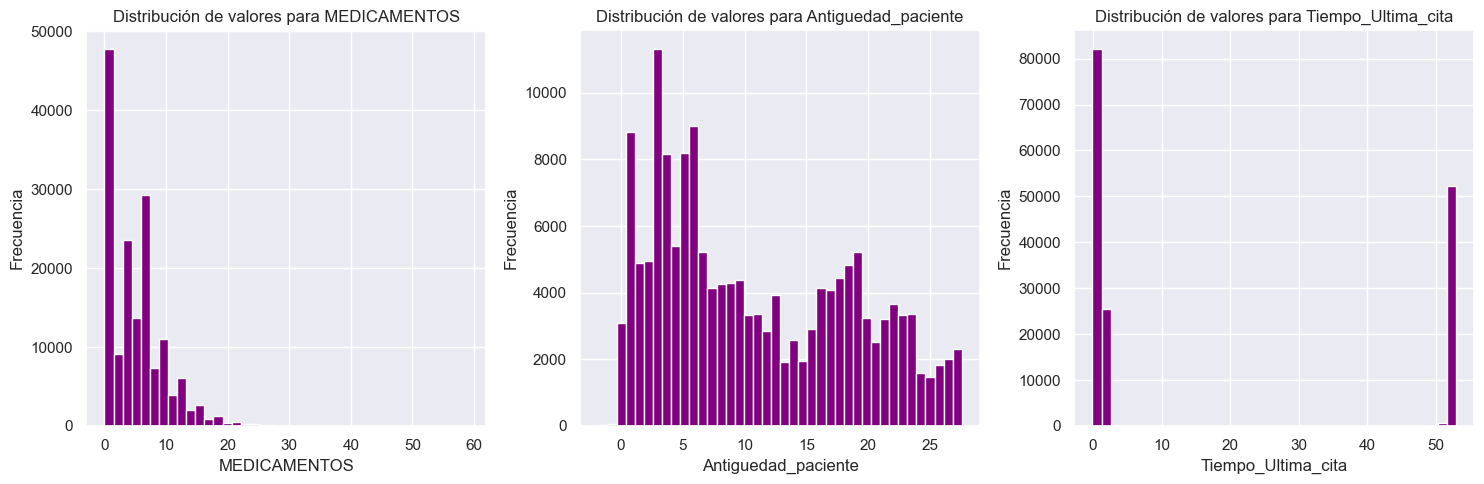

In [379]:
data_numericas = data[num_cols]

total_var_numericas = len(data_numericas.columns)

graficas_por_fila = 3

total_filas = -(-total_var_numericas // graficas_por_fila)  


for i in range(total_filas):
    start_idx = i * graficas_por_fila
    end_idx = min((i + 1) * graficas_por_fila, total_var_numericas)
    fig, axs = plt.subplots(1, end_idx - start_idx, figsize=(15, 5))
    if end_idx - start_idx > 1:
        axs = axs.ravel()
    else:
        axs = [axs]  
    for j, col_idx in enumerate(range(start_idx, end_idx)):
        col = data_numericas.columns[col_idx]
        axs[j].hist(data_numericas[col], bins=40, color='purple')
        axs[j].set_title(f'Distribución de valores para {col}')
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

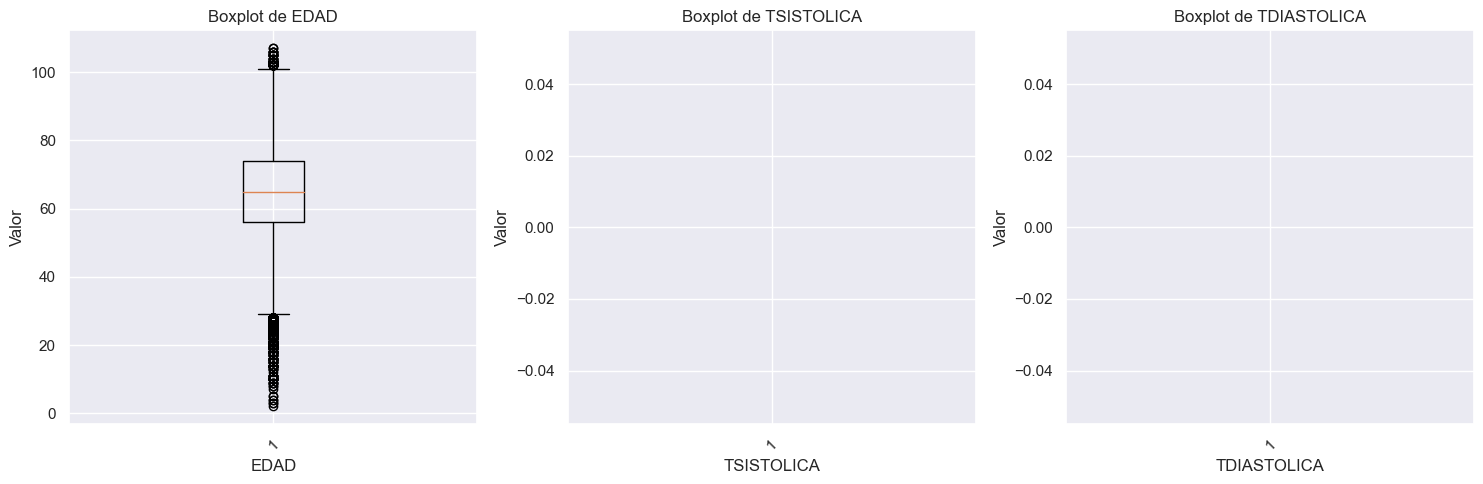

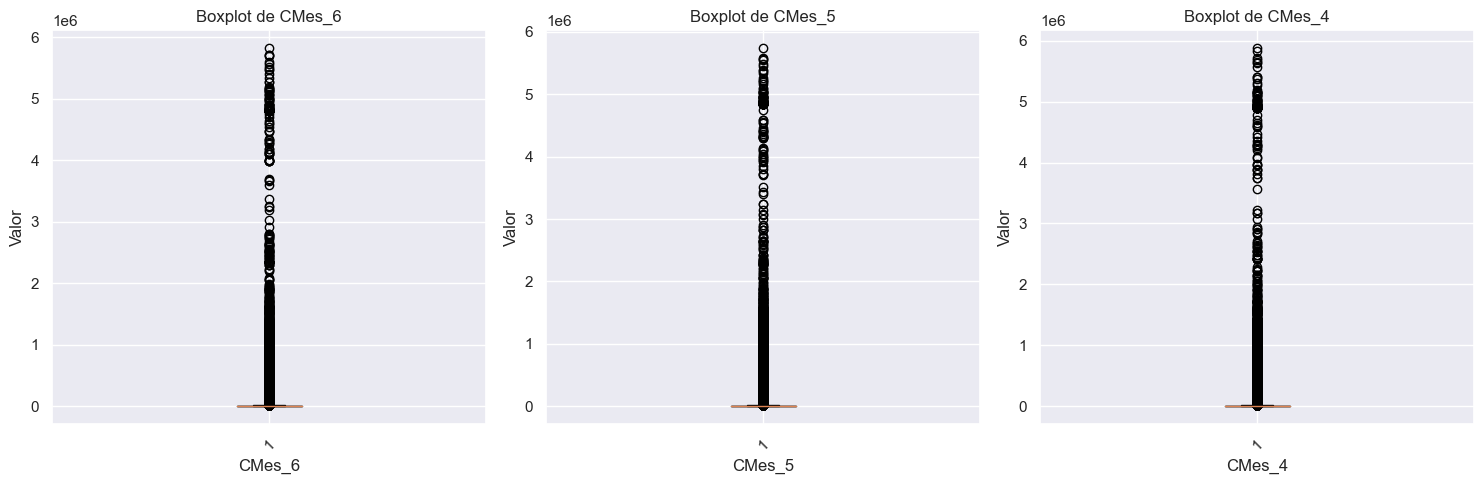

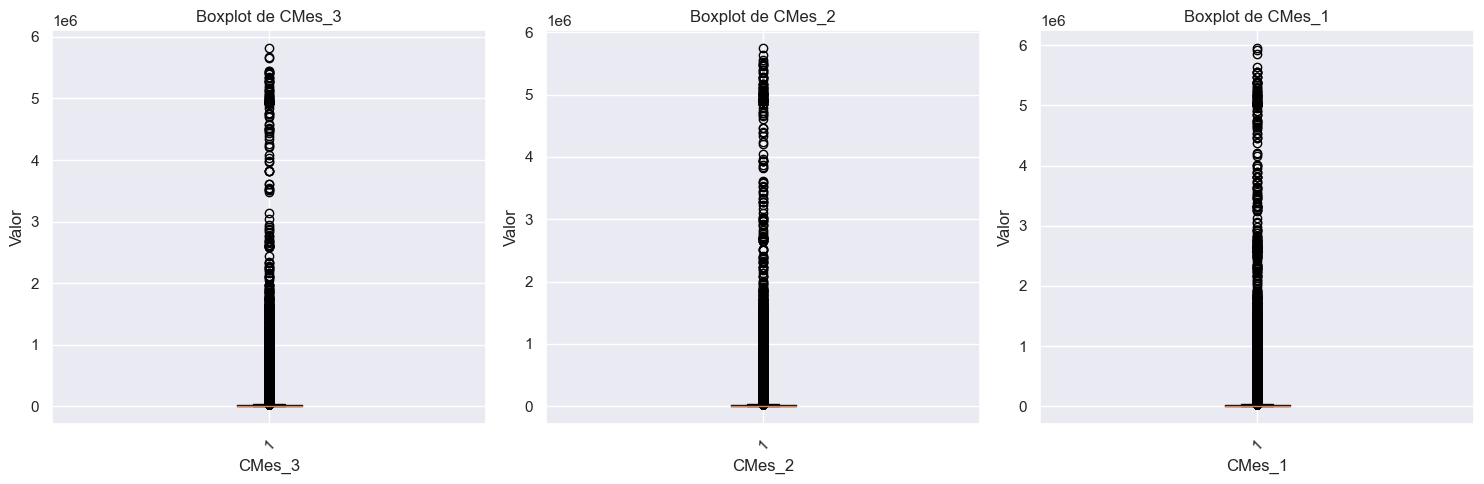

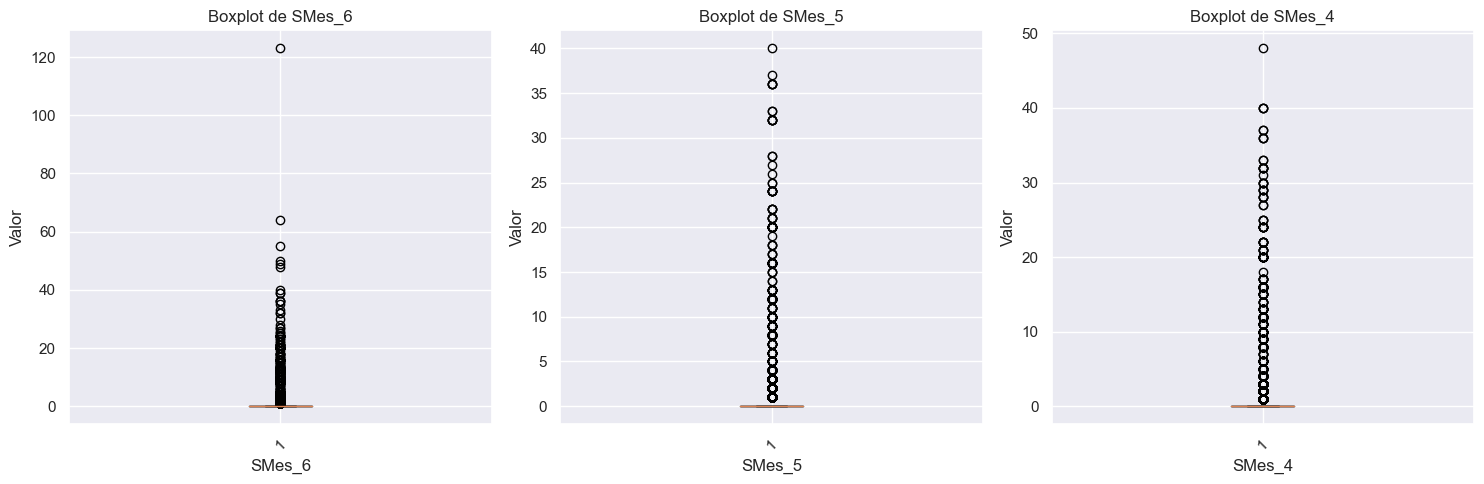

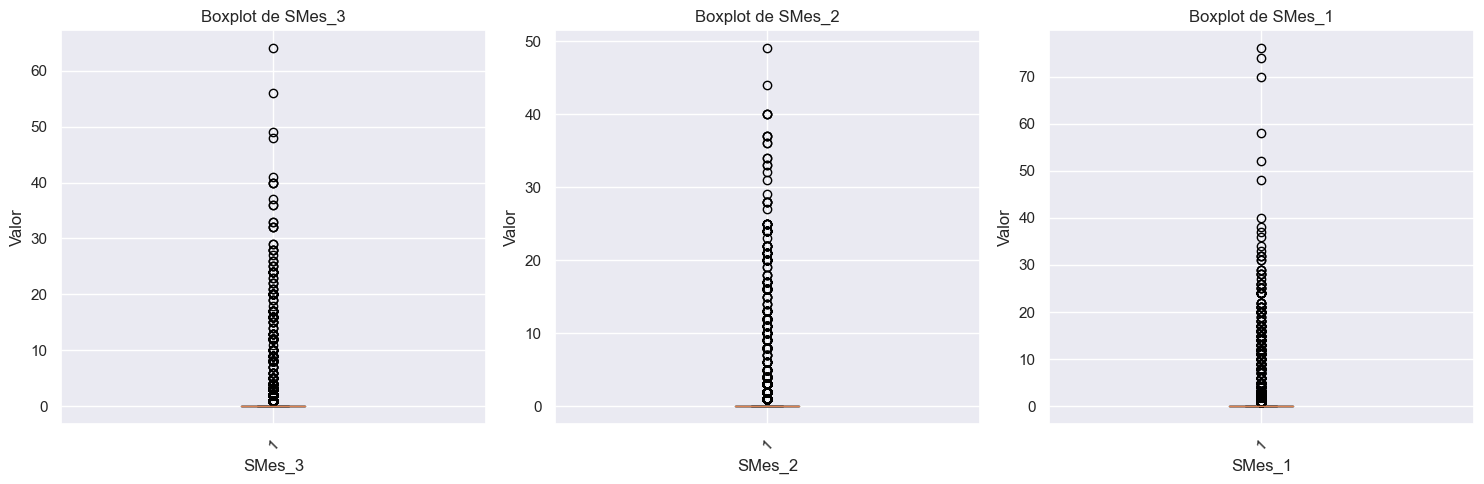

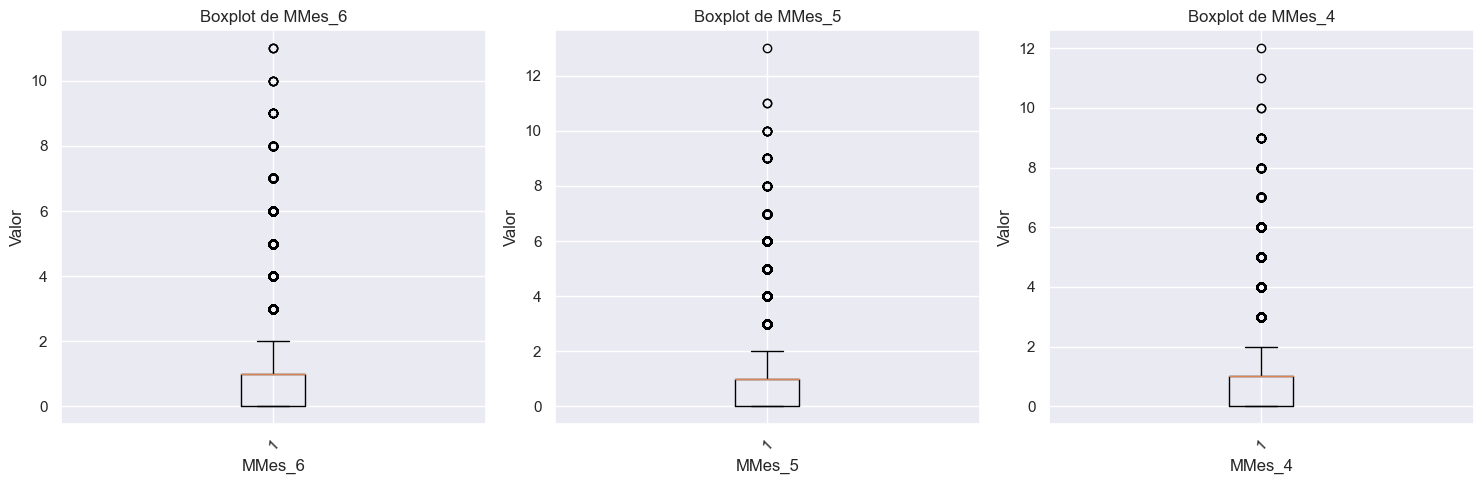

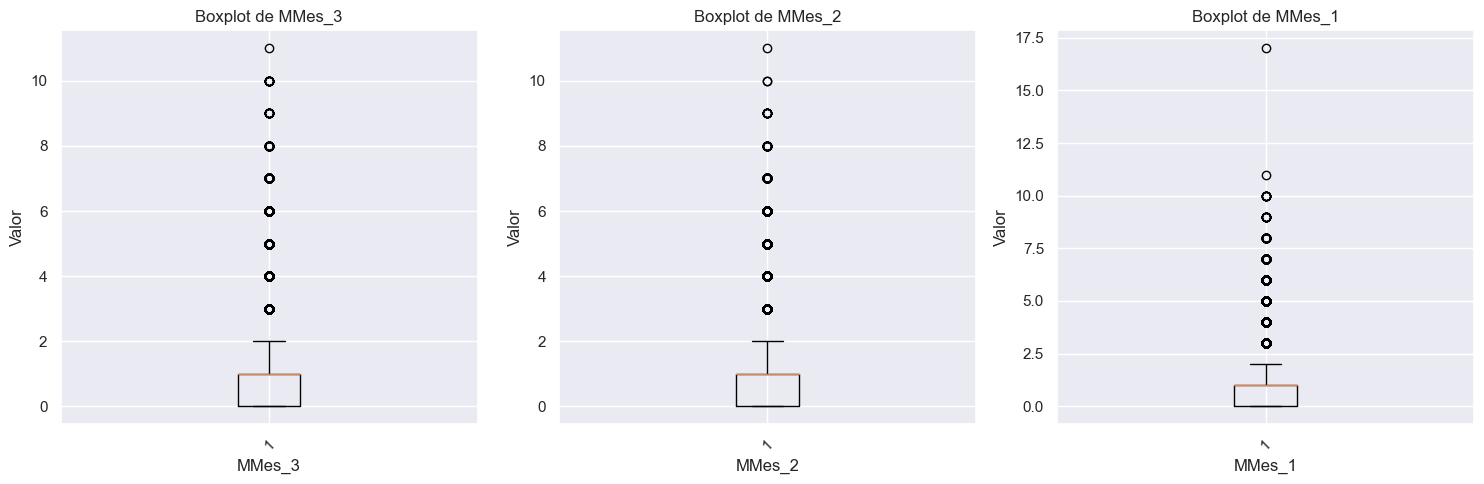

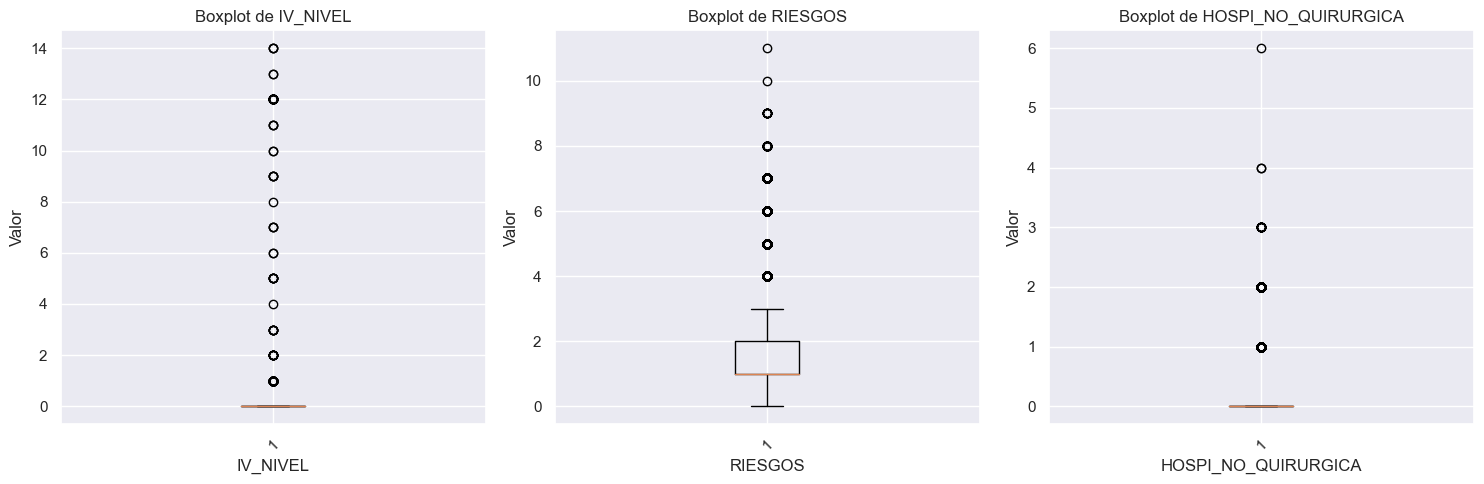

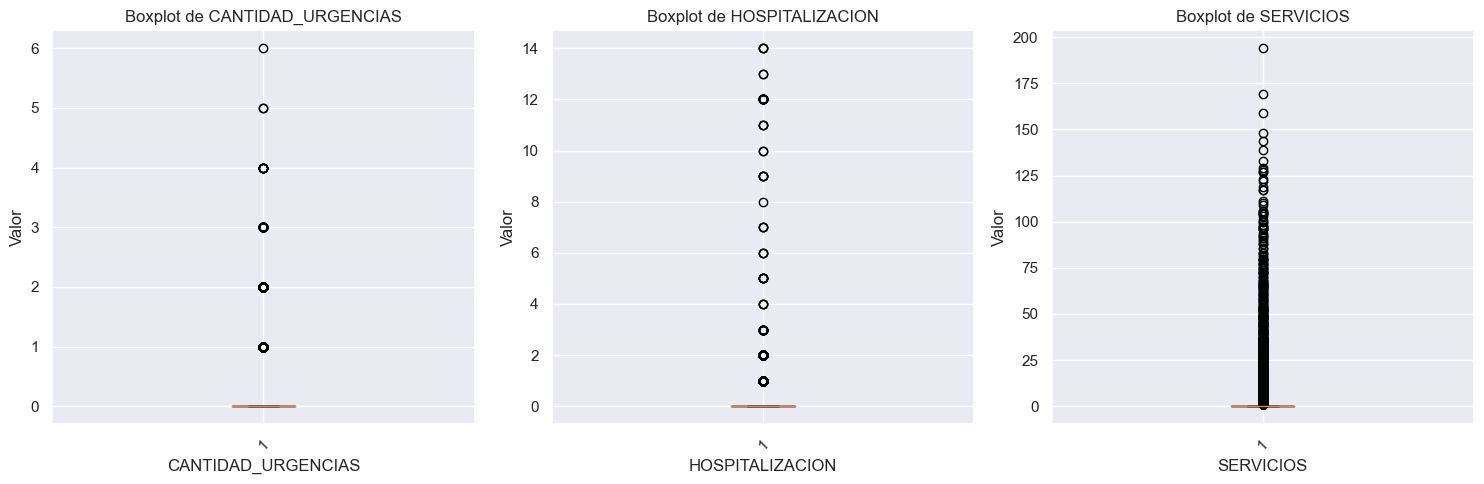

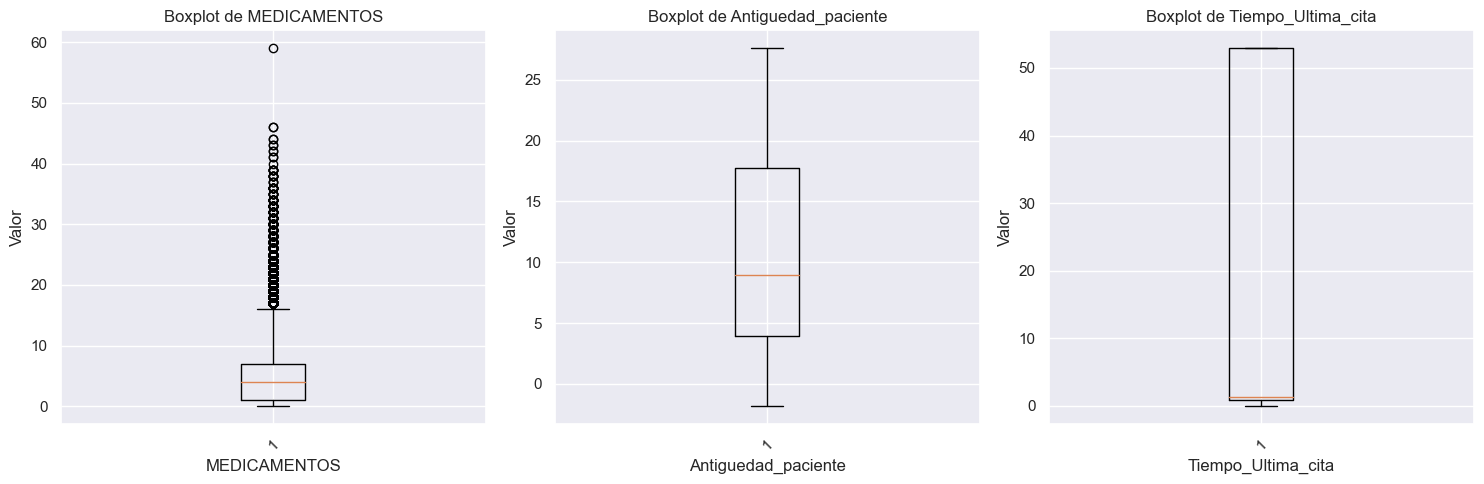

In [380]:
total_var_numericas = len(data_numericas.columns)


graficas_por_fila = 3


total_filas = -(-total_var_numericas // graficas_por_fila)  


for i in range(total_filas):
    start_idx = i * graficas_por_fila
    end_idx = min((i + 1) * graficas_por_fila, total_var_numericas)
    fig, axs = plt.subplots(1, end_idx - start_idx, figsize=(15, 5))
    if end_idx - start_idx > 1:
        axs = axs.ravel()
    else:
        axs = [axs]  
    for j, col_idx in enumerate(range(start_idx, end_idx)):
        col = data_numericas.columns[col_idx]
        axs[j].boxplot(data_numericas[col])
        axs[j].set_title(f'Boxplot de {col}')
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('Valor')
        axs[j].tick_params(axis='x', labelrotation=45)  
    plt.tight_layout()
    plt.show()

In [381]:
data.RIESGOS.value_counts()

1.0     73217
2.0     44887
3.0     19831
0.0     12156
4.0      7077
5.0      2352
6.0       639
7.0       192
8.0        32
9.0        11
11.0        1
10.0        1
Name: RIESGOS, dtype: int64

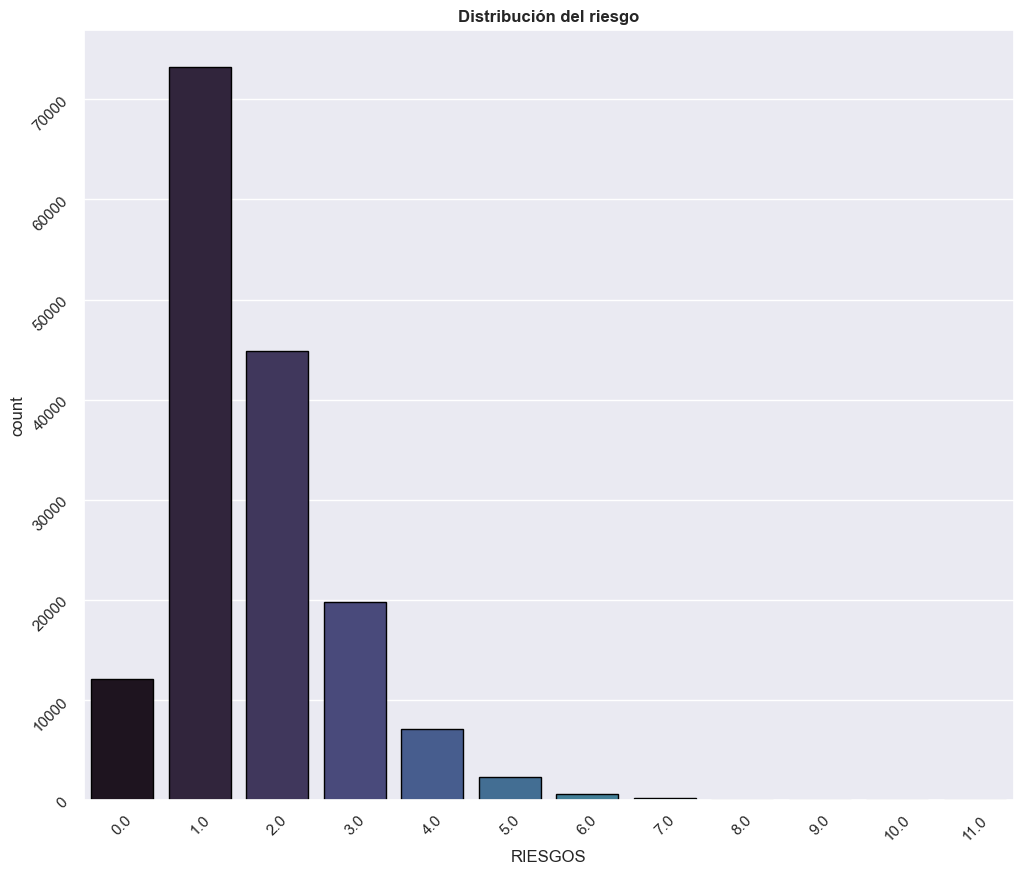

In [382]:
##Grafica de riesgos
plt.figure(figsize=(12,10))
sns.countplot(x="RIESGOS",data=data,palette="mako",edgecolor="black")
plt.title('Distribución del riesgo', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

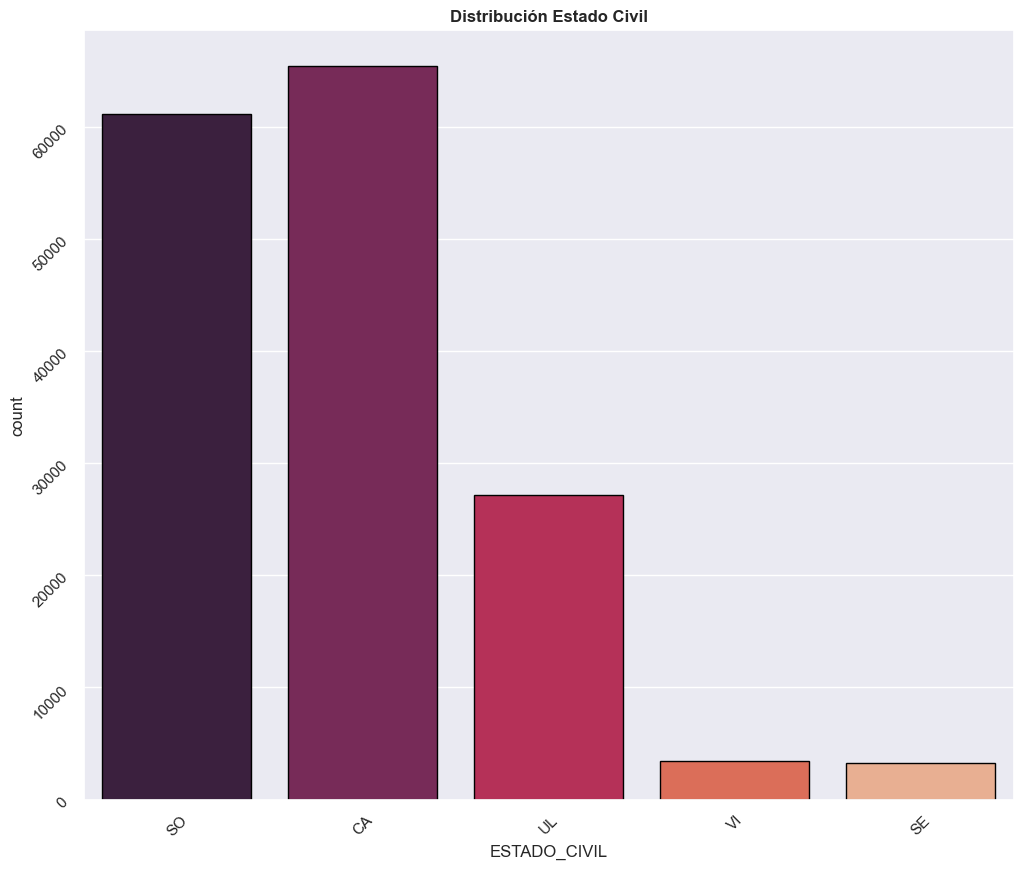

In [383]:
##Graficar la variable "ESTADO_CIVIL"
plt.figure(figsize=(12,10))
sns.countplot(x="ESTADO_CIVIL",data=data,palette="rocket",edgecolor="black")
plt.title('Distribución Estado Civil', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

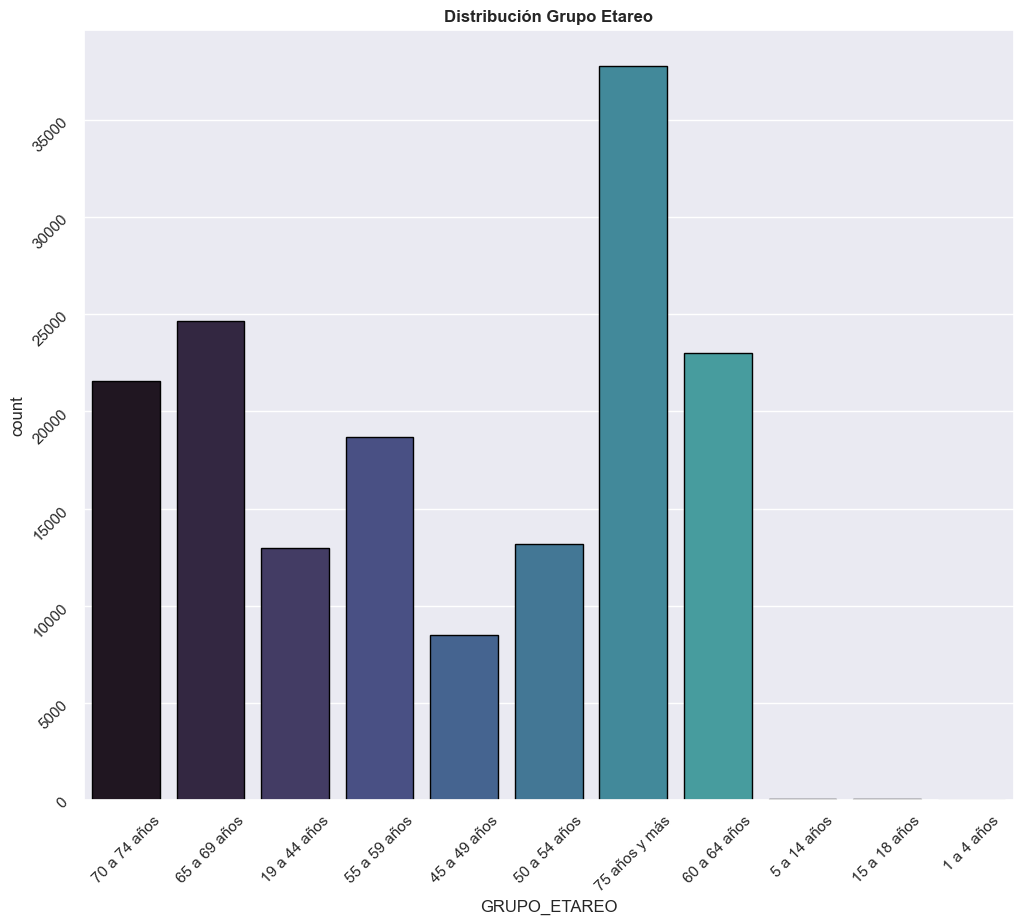

In [384]:
##Graficar la variable "GRUPO ETAREAO"
plt.figure(figsize=(12,10))
sns.countplot(x="GRUPO_ETAREO",data=data,palette="mako",edgecolor="black")
plt.title('Distribución Grupo Etareo', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

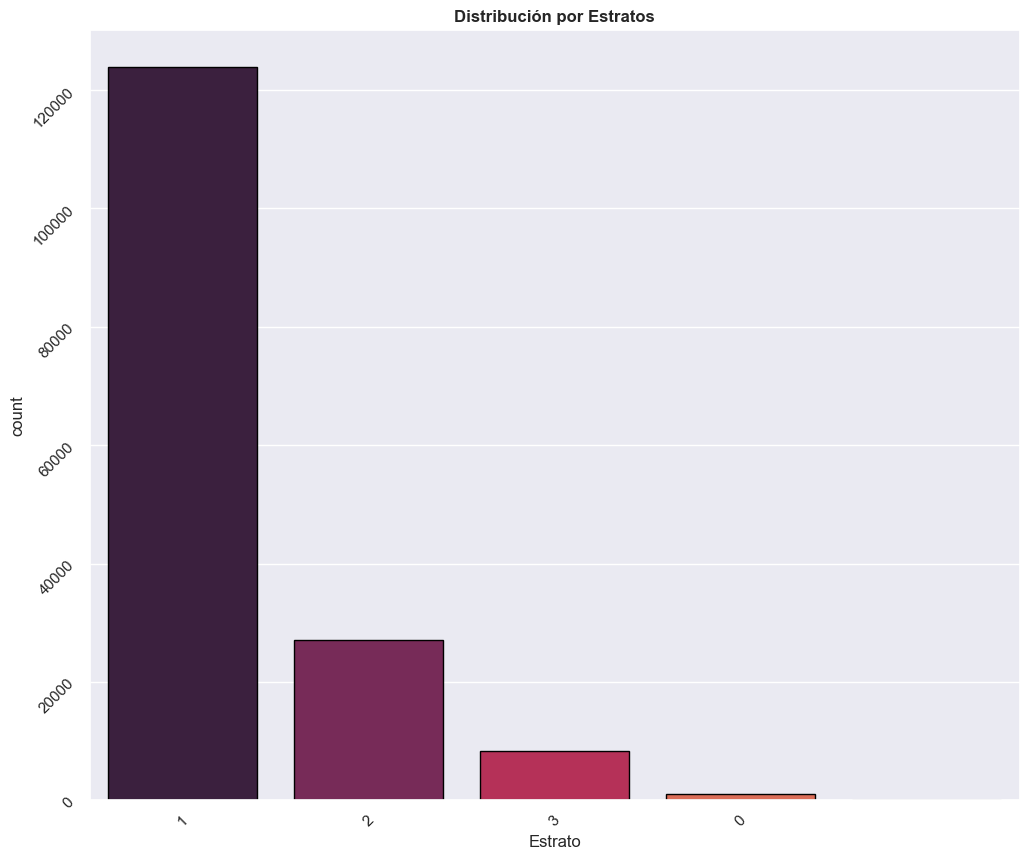

In [385]:
##Graficar la variable "ESTRATO"
plt.figure(figsize=(12,10))
sns.countplot(x="Estrato",data=data,palette="rocket",edgecolor="black")
plt.title('Distribución por Estratos', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

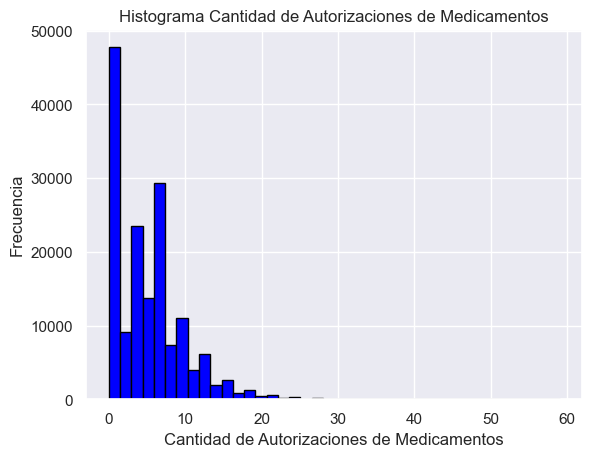

In [386]:
plt.hist(data["MEDICAMENTOS"], bins=40, color="blue", edgecolor="black")  # Cambia el valor de bins según tus necesidades
plt.xlabel("Cantidad de Autorizaciones de Medicamentos")
plt.ylabel("Frecuencia")
plt.title("Histograma Cantidad de Autorizaciones de Medicamentos")
plt.grid(True)
plt.show()

In [387]:
data.Estrato.value_counts()

1    123898
2     27144
3      8253
0      1093
          8
Name: Estrato, dtype: int64

#### **3.1 Analisis del Baseline**

Text(0, 0.5, 'Number of Observations')

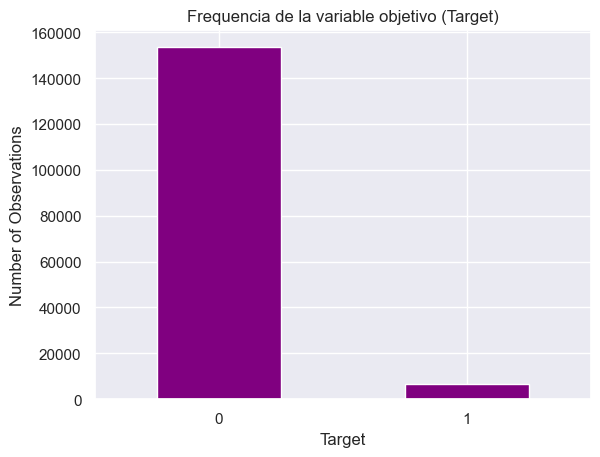

In [388]:
count_classes = pd.value_counts(data['Target'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color='purple')
plt.title("Frequencia de la variable objetivo (Target)")
plt.xlabel("Target")
plt.ylabel("Number of Observations")

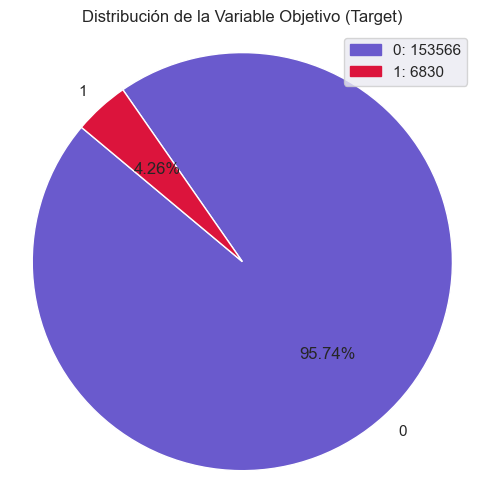

In [389]:
#Recuento de valores en la columna 'Target'
target_counts = data['Target'].value_counts()

#Gráfico de torta Variable objetivo
plt.figure(figsize=(6, 6))
colors = ['slateblue', 'crimson']
plt.pie(target_counts, labels=target_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Distribución de la Variable Objetivo (Target)')
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo en lugar de una elipse
# etiquetas
legend_labels = [mpatches.Patch(color=colors[i], label=f'{target_counts.index[i]}: {target_counts[i]}') for i in range(len(target_counts))]
# leyenda etiquetas
plt.legend(handles=legend_labels, loc='upper right')
plt.show()

Dado el desbalanceo de clases encontrado en la variable objetivo Target, ejecutamos un modelo de Regresión Logística "desequilibrado", como **baseline** para poder comparar y ver si se mejora luego del balanceo de los datos

In [390]:
df = data.dropna(subset=["Target"])
X, y = df.drop(columns="Target"), df["Target"]
y.value_counts(True) * 100

0    95.741789
1     4.258211
Name: Target, dtype: float64

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [392]:
var_categoricas = ['GENERO', 'ESTADO_CIVIL','Estrato', 'ANTIHIPERTENSIVOS', 'AEI', 'CANCER_MAMA_FAMILIAR',
                   'CANCER_OTRO_SITIO_FAMILIAR', 'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR', 'CEREBRAL_FAMILIAR',
                   'ENFERMEDAD_RENAL_FAMILIAR', 'EXFUMADOR', 'FUMADOR', 'COLESTEROL_TOTAL','CREATININA_EN_SUERO_ORINA_OTROS','HDL',
                   'HEMOGLOBINA','TRIGLICERIDOS'
                  ]
var_numericas = X_train.select_dtypes('number').columns

In [393]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, var_numericas),
        ("cat", categorical_transformer, var_categoricas),
    ]
)

def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

data_pipeline = Pipeline(steps=[
    ("data_processor", preprocessor),
    #("pca", PCA()),
])

model_kwargs = dict(
        kernel = 'rbf',
        C = 1.0,
        #probability = True
    )

pipeline = add_model(data_pipeline, LogisticRegression()) 
pipeline 

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3',
       'SMes_2', 'SMes_1', 'MMes_6', 'MMes_5', 'MM...
                                                                    'Estrato',
                                                                    'ANTIHIPERTENSIVOS',
                                                                    'AEI',
                                                                    'CANCER_MAMA_FAMILIAR',
                                                                    'CANCER_OTRO_SITIO_FAMILIAR',
                                                                    'HIPERTENSION_FAMILIAR',
                                                                    'DIABETES_FAMILIAR',
                                                                    'CORONARIOS_FAMILIAR',
                                                                    'CEREBRAL_FAMILIAR',
                                                                    'ENFERMEDAD_RENAL_FAMILIAR',
                                                                    'EXFUMADOR',
                                                                    'FUMADOR',
                                                                    'COLESTEROL_TOTAL',
                                                                    'CREATININA_EN_SUERO_ORINA_OTROS',
                                                                    'HDL',
                                                                    'HEMOGLOBINA',
                                                                    'TRIGLICERIDOS'])]))])),
                ('model', LogisticRegression())])

In [394]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3',
       'SMes_2', 'SMes_1', 'MMes_6', 'MMes_5', 'MM...
                                                                    'Estrato',
                                                                    'ANTIHIPERTENSIVOS',
                                                                    'AEI',
                                                                    'CANCER_MAMA_FAMILIAR',
                                                                    'CANCER_OTRO_SITIO_FAMILIAR',
                                                                    'HIPERTENSION_FAMILIAR',
                                                                    'DIABETES_FAMILIAR',
                                                                    'CORONARIOS_FAMILIAR',
                                                                    'CEREBRAL_FAMILIAR',
                                                                    'ENFERMEDAD_RENAL_FAMILIAR',
                                                                    'EXFUMADOR',
                                                                    'FUMADOR',
                                                                    'COLESTEROL_TOTAL',
                                                                    'CREATININA_EN_SUERO_ORINA_OTROS',
                                                                    'HDL',
                                                                    'HEMOGLOBINA',
                                                                    'TRIGLICERIDOS'])]))])),
                ('model', LogisticRegression())])

In [395]:
##Hacer predicciones en los conjuntos de datos de prueba y entrenamiento
test_preds = pipeline.predict(X_test) ##predecir las etiquetas para el conjunto de datos de prueba
train_preds = pipeline.predict(X_train) ##predecir las etiquetas para el conjunto de datos de entrenamiento
##cuenta la ocurrencia de cada valor único en la serie
pd.DataFrame(test_preds).value_counts()

0    23851
1      209
dtype: int64

In [396]:
##Calcula el mejor umbral para la clasifiación utilizando el F1-Score en el conjunto de prueba
test_preds = pipeline.predict_proba(X_test)[:, 1] #predice las probabilidades de pertenecer a la clase positiva (1) en el conjunto de prueba
train_preds = pipeline.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000) ##genera 1000 valores de umbral entre 0 y 1 para probar.
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])] #calcula el puntaje F1 para cada umbral en ths
best_th #encuentra el umbral que maximiza el puntaje F1 y lo almacena en best_th.
##Este proceso ayuda a encontrar un umbral óptimo para convertir las probabilidades en predicciones binarias, maximizando el rendimiento del modelo en términos de F1-score.

0.18218218218218218

In [397]:
test_f1 = f1_score(y_test, test_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de prueba
train_f1 = f1_score(y_train, train_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de entrenamiento
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.3555475504322767
Test f1: 0.3620689655172414


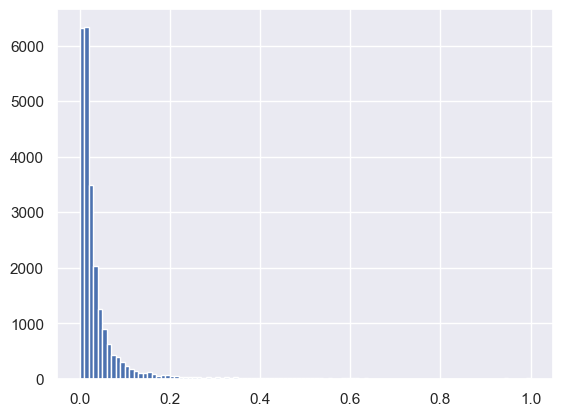

In [398]:
plt.hist(test_preds, bins=100)
plt.show()

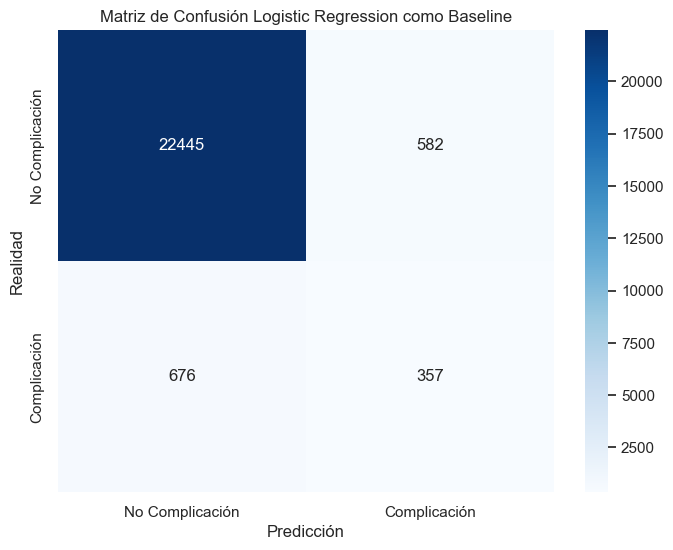

             Clase  F1-Score
0  No Complicación  0.972740
1     Complicación  0.362069


In [399]:
# Obtén las predicciones en el conjunto de prueba
y_pred = test_preds > best_th

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas para la matriz de confusión
class_names = ['No Complicación', 'Complicación']

# Crea un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión Logistic Regression como Baseline')
plt.show()

# Calcula el f1-score para cada clase
f1_score_no_complication = f1_score(y_test, y_pred, pos_label=0)
f1_score_complication = f1_score(y_test, y_pred, pos_label=1)

# Crea una tabla para mostrar los f1-scores
f1_score_table = pd.DataFrame({
    'Clase': ['No Complicación', 'Complicación'],
    'F1-Score': [f1_score_no_complication, f1_score_complication]
})

print(f1_score_table)

#### **3.2 Analisis de missing values**

In [400]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=["Total", "Porcentaje Nulos(%)"])
missing_data

,Total,Porcentaje Nulos(%)
ALBUMINURIA24,154407,96.266116
FECHA_ALBUMINURIA24_LAB,154407,96.266116
FECHA_CREATININA_24_LAB,150398,93.766677
CREATININA_24,150398,93.766677
FECHA_PROTEINURIA_LAB,145215,90.535300
...,...,...
CMes_5,0,0.000000
CMes_4,0,0.000000
CMes_3,0,0.000000
CMes_2,0,0.000000


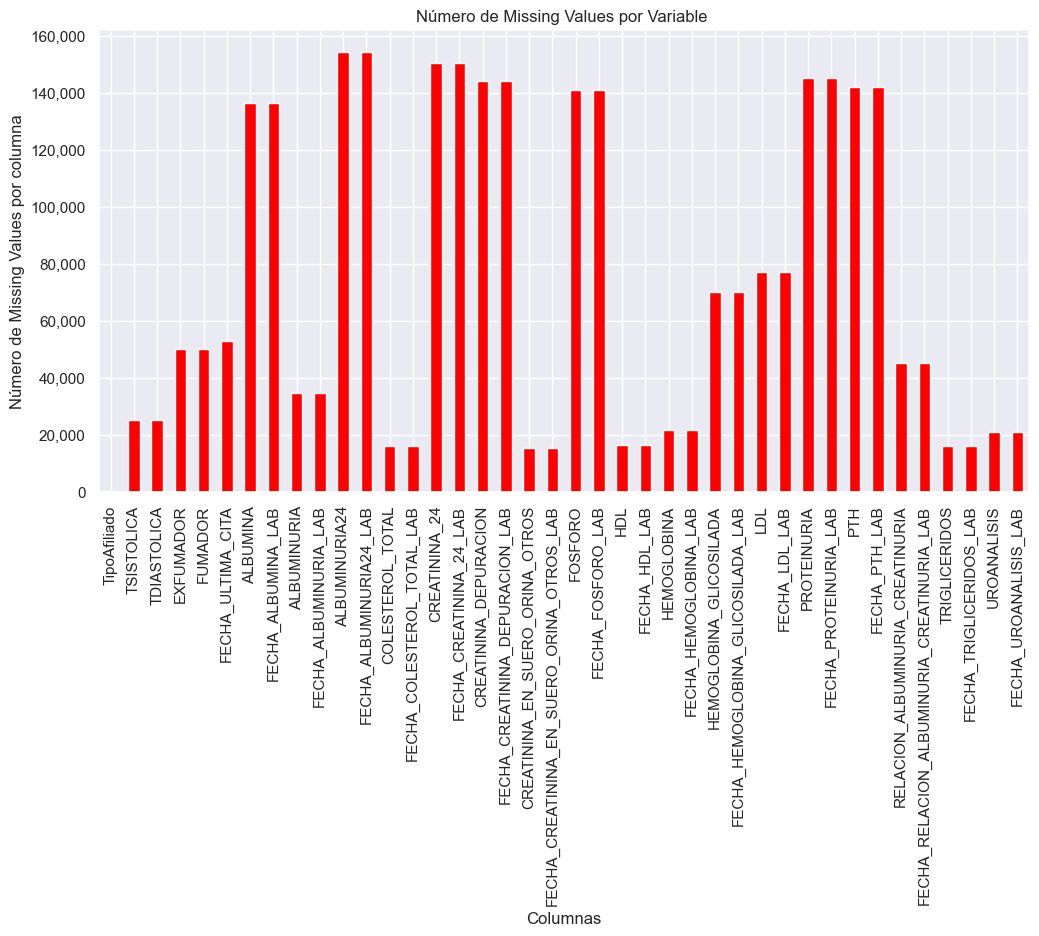

In [401]:
# Número de missing values x variable
missing_values_count = data.isnull().sum()

# Filtro las columnas con valores nulos (mayor a cero)
columns_with_missing = missing_values_count[missing_values_count > 0]

# Grafica de barras que muestra el número de valores nulos de cada variable
plt.figure(figsize=(12, 6))
ax = columns_with_missing.plot(kind='bar', color='red')
plt.title('Número de Missing Values por Variable ')
plt.xlabel('Columnas')
plt.ylabel('Número de Missing Values por columna')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


In [402]:
### Elimino datos duplicados
duplicates = data[data.duplicated()]
print("Total datos duplicados observados:", duplicates.shape[0])
print("Dropping duplicados")

# Dropping duplicates
print("Shape antes de sacar duplicados: ", data.shape[0])
data.drop_duplicates(inplace=True)
print("Shae despúes de sacar duplicados: ", data.shape[0])

Total datos duplicados observados: 220
Dropping duplicados
Shape antes de sacar duplicados:  160396
Shae despúes de sacar duplicados:  160176


#### **Analisis de outliers**

In [403]:
print(data["TSISTOLICA"].describe())
print(data["TDIASTOLICA"].describe())

count    135371.000000
mean        130.330189
std         765.407998
min           0.000000
25%         120.000000
50%         120.000000
75%         130.000000
max      191100.000000
Name: TSISTOLICA, dtype: float64
count    135306.000000
mean         78.261481
std          35.803540
min           0.000000
25%          70.000000
50%          80.000000
75%          80.000000
max        8080.000000
Name: TDIASTOLICA, dtype: float64


In [404]:
print(data.TSISTOLICA.value_counts())

120.0    45278
130.0    21439
110.0    13551
140.0     9202
125.0     4685
         ...  
56.0         1
196.0        1
82.0         1
218.0        1
79.0         1
Name: TSISTOLICA, Length: 191, dtype: int64


In [405]:
 #Contar la cantidad de filas antes y después de la eliminación de outliers
count_before_tsistolica = len(data["TSISTOLICA"])
count_after_tsistolica = len(data_cleaned_tsistolica)

count_before_tdiastolica = len(data["TDIASTOLICA"])
count_after_tdiastolica = len(data_cleaned_tdiastolica)

# Calcular la cantidad de valores atípicos eliminados
outliers_removed_tsistolica = count_before_tsistolica - count_after_tsistolica
outliers_removed_tdiastolica = count_before_tdiastolica - count_after_tdiastolica

print("Valores atípicos a eliminadar en la variable TSISTOLICA:", outliers_removed_tsistolica)
print("Valores atípicos a eliminadar en la variable TDIASTOLICA:", outliers_removed_tdiastolica)

Valores atípicos a eliminadar en la variable TSISTOLICA: 40128
Valores atípicos a eliminadar en la variable TDIASTOLICA: 31000


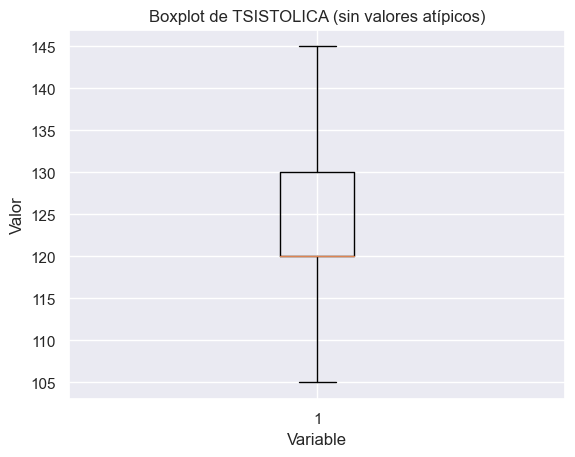

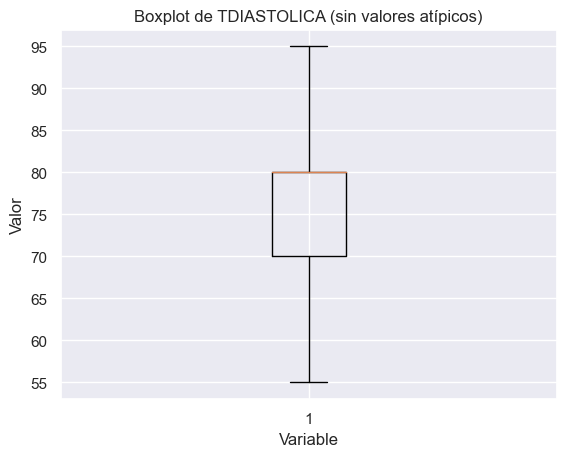

In [406]:
# Función para identificar y remover valores atípicos utilizando el rango intercuartílico
def remove_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

# Remover valores atípicos para TSISTOLICA y TDIASTOLICA
data_cleaned_tsistolica = remove_outliers(data, "TSISTOLICA")
data_cleaned_tdiastolica = remove_outliers(data, "TDIASTOLICA")

# Crear boxplot para TSISTOLICA
plt.boxplot(data_cleaned_tsistolica["TSISTOLICA"])
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.title("Boxplot de TSISTOLICA (sin valores atípicos)")
plt.show()

# Crear boxplot para TDIASTOLICA
plt.boxplot(data_cleaned_tdiastolica["TDIASTOLICA"])
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.title("Boxplot de TDIASTOLICA (sin valores atípicos)")
plt.show()

Preferiblemente se debe eliminar las variables "TSISTOLICA" Y "TDIASTOLICA" ya que tiene muchos valores atipicos

### **Feature Importante (selección de variables)**

In [407]:
# Concatena las columnas numéricas, categóricas y ordinales para usarlas como características.
features = num_cols + cat_cols + ord_cols

features = [feature for feature in features if feature in data.columns]

X = data[features]
y = data['Target']  

# imptación missing values
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

# Convierte las características categóricas y ordinales en variables dummy (one-hot encoding).
X = pd.get_dummies(X, columns=cat_cols + ord_cols)

In [408]:
#Entrenamiento del modelo y feature importance
rf_model = XGBClassifier(random_state=42)
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_

In [409]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature  Importance
29       Tiempo_Ultima_cita    0.336063
63       COLESTEROL_TOTAL_1    0.133469
21                 IV_NIVEL    0.097479
26                SERVICIOS    0.020105
23      HOSPI_NO_QUIRURGICA    0.013776
..                      ...         ...
49  HIPERTENSION_FAMILIAR_1    0.000000
51      DIABETES_FAMILIAR_1    0.000000
53    CORONARIOS_FAMILIAR_1    0.000000
55      CEREBRAL_FAMILIAR_1    0.000000
59                FUMADOR_0    0.000000

[93 rows x 2 columns]


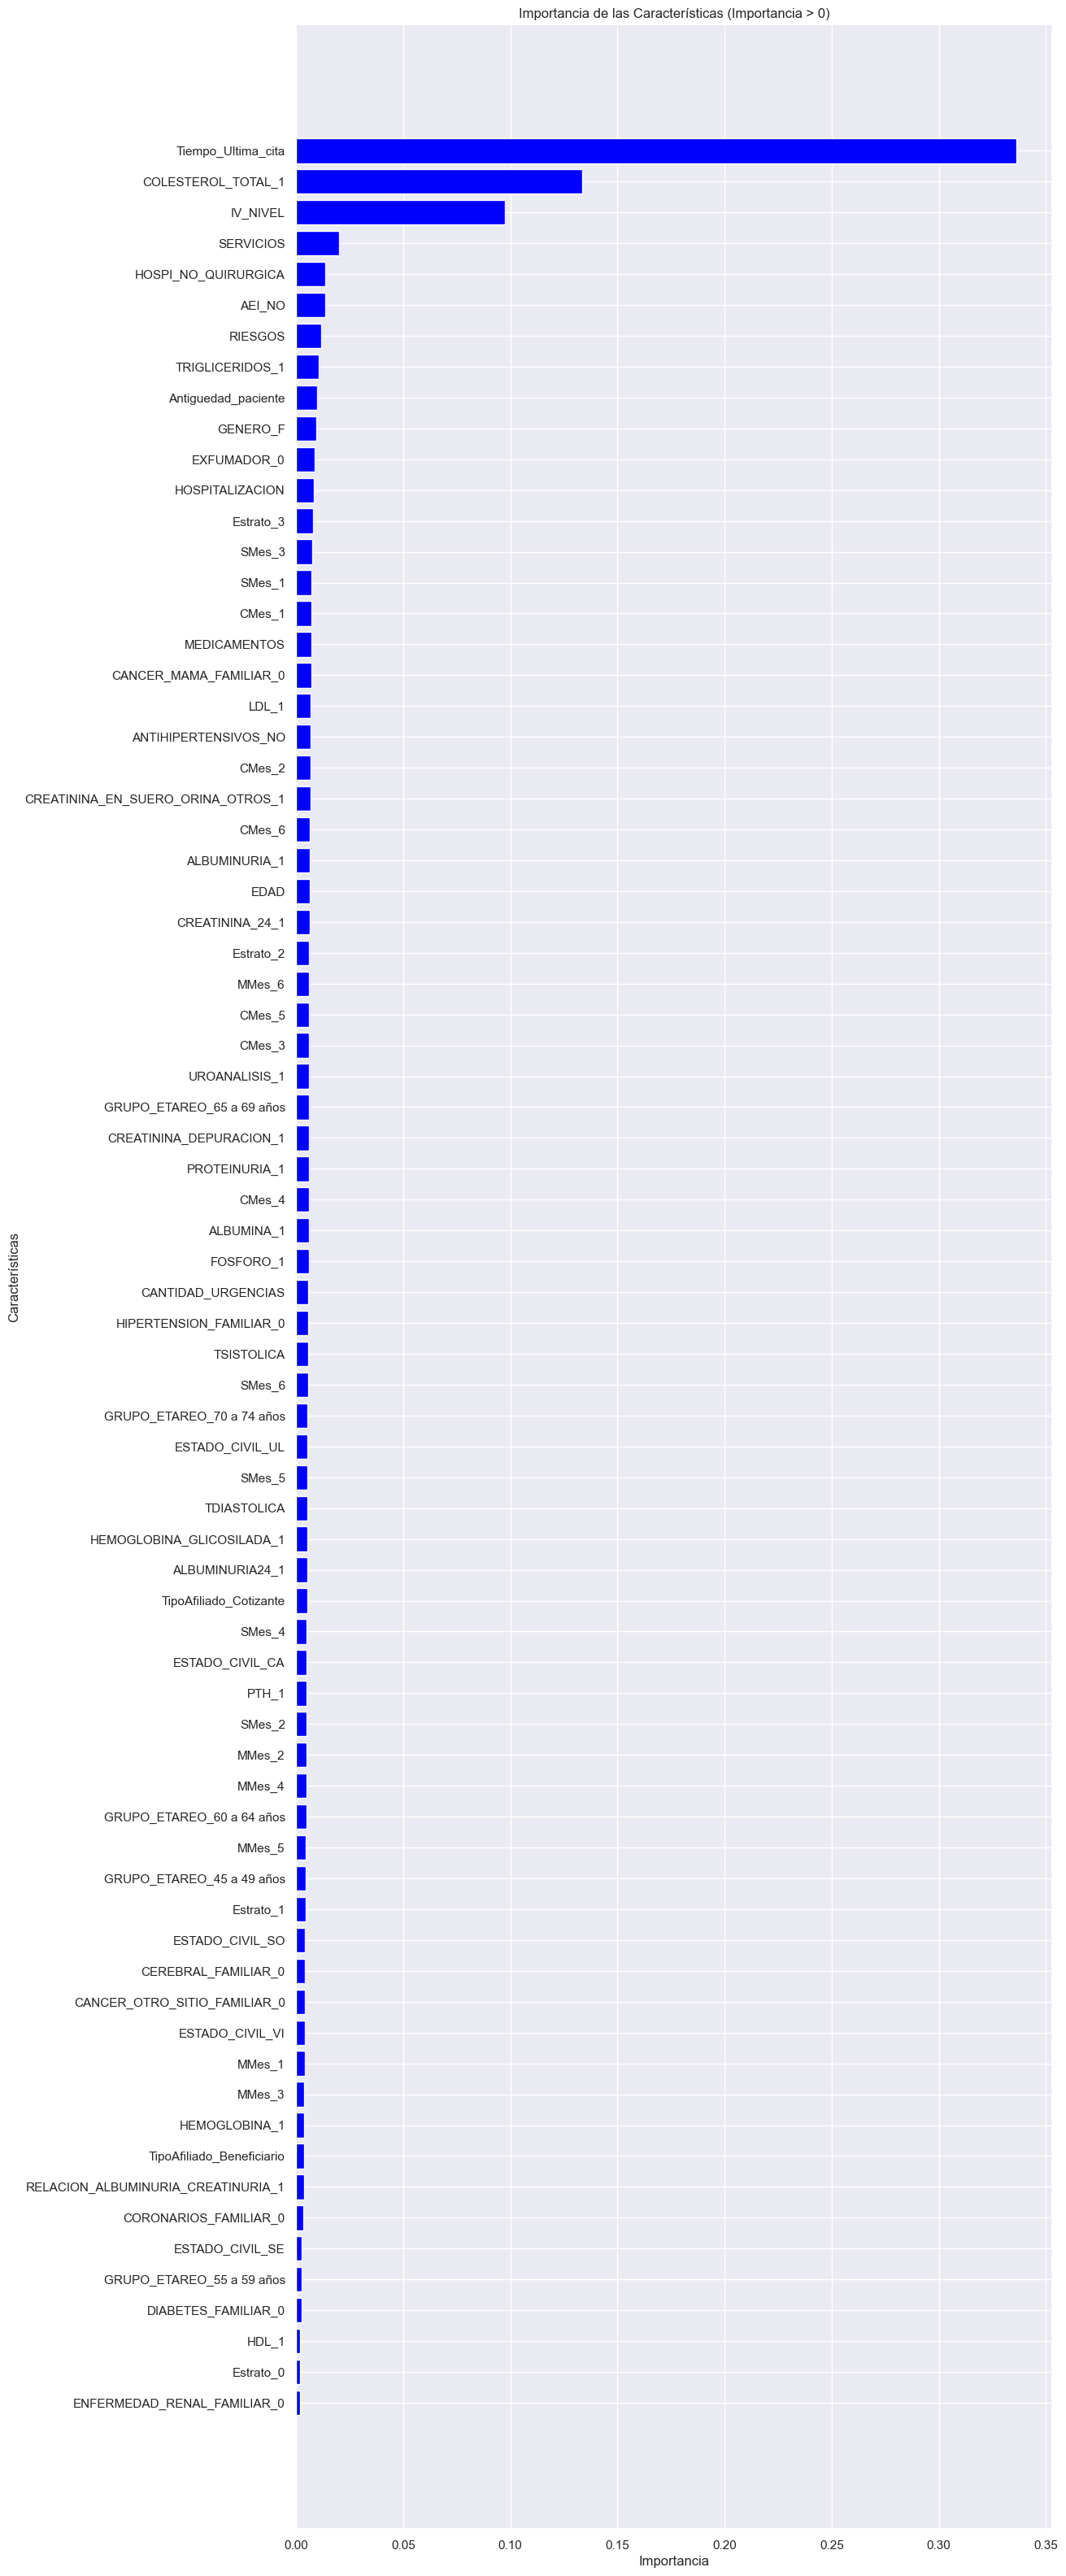

In [410]:
# Principales características
non_zero_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]

plt.figure(figsize=(12, 40))
plt.barh(non_zero_importance_df['Feature'], non_zero_importance_df['Importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características (Importancia > 0)')
plt.gca().invert_yaxis()  

### **PCA** (componentes principales)

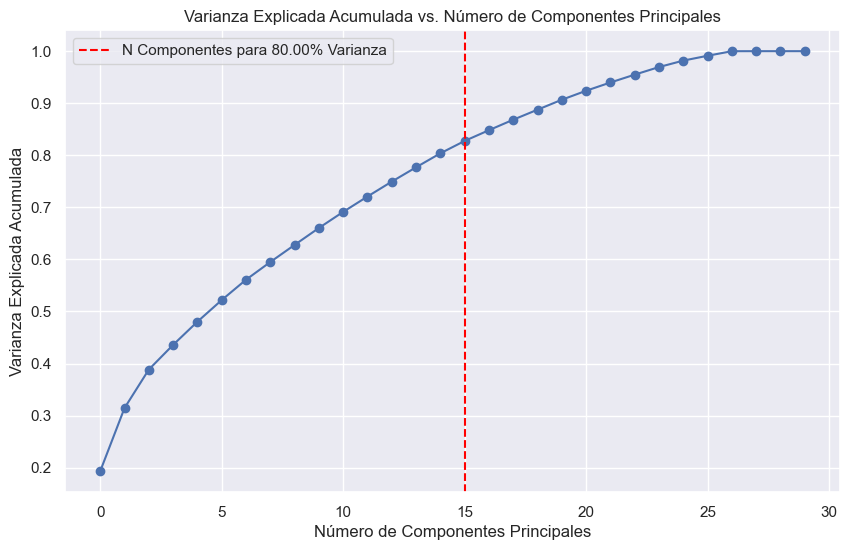

Número de componentes para alcanzar 80.0 % de varianza explicada: 15


In [428]:
X = data[num_cols].fillna(data[num_cols].mean())
var_num = num_cols
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar el modelo PCA
pca = PCA()

pca.fit(X_scaled)

# Varianza explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Encuentra el número de componentes para alcanzar un porcentaje de varianza explicada deseado
target_variance = 0.80  

n_components_to_reach_variance = np.argmax(explained_variance_ratio_cumulative >= target_variance) + 1

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio_cumulative, marker='o')
plt.axvline(n_components_to_reach_variance, color='red', linestyle='--', label=f'N Componentes para {target_variance*100:.2f}% Varianza')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()

print('Número de componentes para alcanzar', target_variance*100, '% de varianza explicada:', n_components_to_reach_variance)

# Aplicar PCA con el número óptimo de componentes
pca_optimized = PCA(n_components=n_components_to_reach_variance)
X_pca_optimized = pca_optimized.fit_transform(X_scaled)

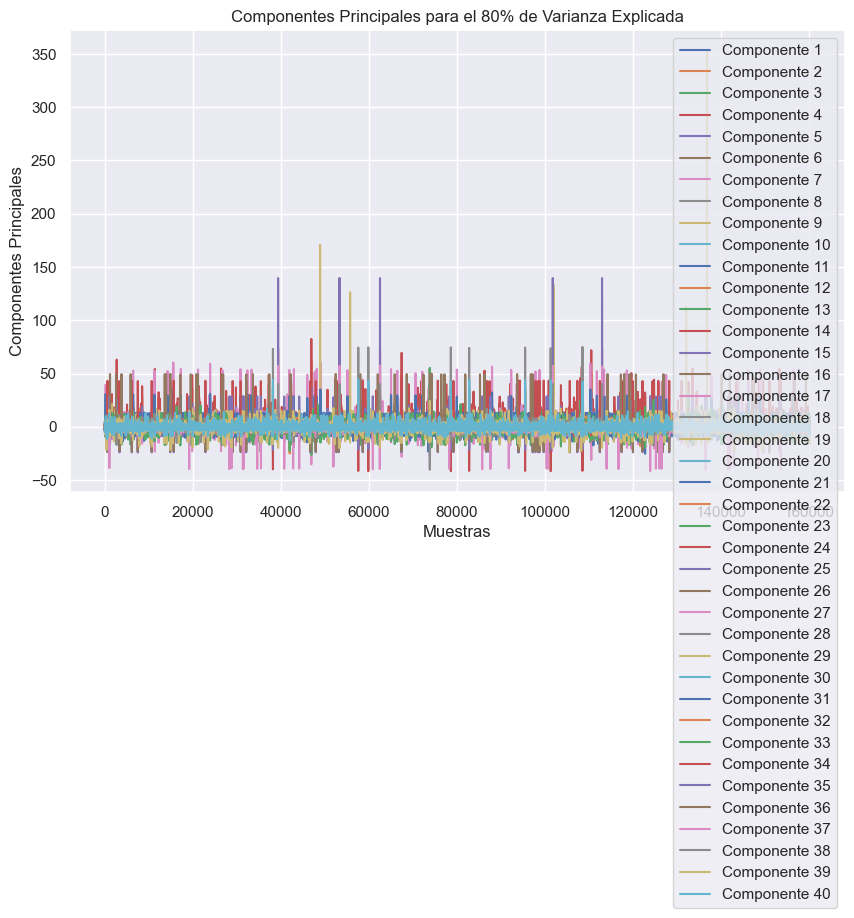

In [415]:
# Establece el número de componentes para alcanzar el 80% de varianza explicada
target_variance = 0.80

# Encuentra el número de componentes para alcanzar el objetivo de varianza explicada
n_components_80 = np.argmax(explained_variance_ratio_cumulative >= target_variance) + 1

# Aplica PCA con el número de componentes correspondiente al 80% de varianza explicada
pca_80 = PCA(n_components=n_components_80)
X_pca_80 = pca_80.fit_transform(X_scaled)

# Graficar los componentes principales
plt.figure(figsize=(10, 6))
for i in range(n_components_80):
    plt.plot(X_pca_80[:, i], label=f'Componente {i+1}')

plt.xlabel('Muestras')
plt.ylabel('Componentes Principales')
plt.title('Componentes Principales para el 80% de Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

In [429]:
# Vamos a trabajar solo con las columnas numéricas y llenar los valores faltantes con la media.
X = data[num_cols].fillna(data[num_cols].mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)


principal_df = pd.DataFrame(data=principal_components, columns=['Componente1', 'Componente2', 'Componente3',
                                                               'Componente4','Componente5'])

principal_df['Target'] = data['Target']


print(principal_df.head())

explained_variance_ratio = pca.explained_variance_ratio_
print('Varianza explicada por cada componente:', explained_variance_ratio)

   Componente1  Componente2  Componente3  Componente4  Componente5  Target
0    -2.335733     0.833993     0.177384     0.408335    -0.327958     0.0
1    -0.870583    -0.088606    -0.097091     0.219382     0.240670     0.0
2    -0.325376    -0.367934    -0.186623     0.055247     0.266014     NaN
3    -1.182560     0.009435    -0.063988     0.117093     0.417351     0.0
4    -0.976609    -0.006752    -0.122530    -0.031251    -0.027927     0.0
Varianza explicada por cada componente: [0.19331522 0.12126179 0.07390394 0.04737904 0.04446932]


#### **3.5 Particionamiento de datos:**

In [128]:
#Creo un dataframe solamente con la variable objetivo
df = data.dropna(subset=["Target"])

In [129]:
#Nombro mis variables explicativas con "X" y mi variable objetivo "y"
X, y = df.drop(columns="Target"), df["Target"]
y.value_counts(True) * 100

0    95.73594
1     4.26406
Name: Target, dtype: float64

In [130]:
### Particiono los datos en entrenamiento y prueba con una lógica de 85% y 15% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### **División en subconjuntos y balanceo**

In [131]:
# Creo un DataFrame solamente con la variable objetivo
df = data.dropna(subset=["Target"])
X, y = df.drop(columns="Target"), df["Target"]

# Divido los datos en conjunto de entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combino las características y la variable target para el conjunto de entrenamiento
train_data = pd.concat([X_train, y_train], axis=1)

# Aseguro el balance de clases en el conjunto de entrenamiento
# Muestreo 2000 datos de cada clase para el conjunto de entrenamiento
train_data_balanced = pd.concat([
    train_data[train_data['Target'] == 0].sample(n=1600, replace=False),
    train_data[train_data['Target'] == 1].sample(n=400, replace=False)
])

# Divido nuevamente los datos en características y variable target para el conjunto de entrenamiento balanceado
X_train_balanced = train_data_balanced.drop('Target', axis=1)
y_train_balanced = train_data_balanced['Target']

# Aseguro el balance de clases en el conjunto de validación
val_data = pd.concat([X_val, y_val], axis=1)
val_data_balanced = pd.concat([
    val_data[val_data['Target'] == 0].sample(n=1600, replace=False),
    val_data[val_data['Target'] == 1].sample(n=400, replace=False)
])

# Divido nuevamente los datos en características y variable target para el conjunto de validación balanceado
X_val_balanced = val_data_balanced.drop('Target', axis=1)
y_val_balanced = val_data_balanced['Target']

print("Tamaño de X_train_balanced:", X_train_balanced.shape)
print("Tamaño de y_train_balanced:", y_train_balanced.shape)
print("Tamaño de X_val_balanced:", X_val_balanced.shape)
print("Tamaño de y_val_balanced:", y_val_balanced.shape)

# Verifica el balance de clases en el conjunto de entrenamiento balanceado
print("\nBalance de clases en el conjunto de entrenamiento balanceado:")
print(y_train_balanced.value_counts())
print( y_train_balanced.value_counts(True))
# Verifica el balance de clases en el conjunto de validación balanceado
print("\nBalance de clases en el conjunto de validación balanceado:")
print(y_val_balanced.value_counts())
print (y_val_balanced.value_counts(True))

Tamaño de X_train_balanced: (2000, 82)
Tamaño de y_train_balanced: (2000,)
Tamaño de X_val_balanced: (2000, 82)
Tamaño de y_val_balanced: (2000,)

Balance de clases en el conjunto de entrenamiento balanceado:
0    1600
1     400
Name: Target, dtype: int64
0    0.8
1    0.2
Name: Target, dtype: float64

Balance de clases en el conjunto de validación balanceado:
0    1600
1     400
Name: Target, dtype: int64
0    0.8
1    0.2
Name: Target, dtype: float64


In [132]:
X_train_balanced.head()

,GENERO,ESTADO_CIVIL,EDAD,GRUPO_ETAREO,TipoAfiliado,Estrato,TSISTOLICA,TDIASTOLICA,ANTIHIPERTENSIVOS,AEI,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO_FAMILIAR,HIPERTENSION_FAMILIAR,DIABETES_FAMILIAR,CORONARIOS_FAMILIAR,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL_FAMILIAR,EXFUMADOR,FUMADOR,FECHA_ULTIMA_CITA,ALBUMINA,FECHA_ALBUMINA_LAB,ALBUMINURIA,FECHA_ALBUMINURIA_LAB,ALBUMINURIA24,FECHA_ALBUMINURIA24_LAB,COLESTEROL_TOTAL,FECHA_COLESTEROL_TOTAL_LAB,CREATININA_24,FECHA_CREATININA_24_LAB,CREATININA_DEPURACION,FECHA_CREATININA_DEPURACION_LAB,CREATININA_EN_SUERO_ORINA_OTROS,FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB,FOSFORO,FECHA_FOSFORO_LAB,HDL,FECHA_HDL_LAB,HEMOGLOBINA,FECHA_HEMOGLOBINA_LAB,HEMOGLOBINA_GLICOSILADA,FECHA_HEMOGLOBINA_GLICOSILADA_LAB,LDL,FECHA_LDL_LAB,PROTEINURIA,FECHA_PROTEINURIA_LAB,PTH,FECHA_PTH_LAB,RELACION_ALBUMINURIA_CREATINURIA,FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB,TRIGLICERIDOS,FECHA_TRIGLICERIDOS_LAB,UROANALISIS,FECHA_UROANALISIS_LAB,CMes_6,CMes_5,CMes_4,CMes_3,CMes_2,CMes_1,SMes_6,SMes_5,SMes_4,SMes_3,SMes_2,SMes_1,MMes_6,MMes_5,MMes_4,MMes_3,MMes_2,MMes_1,FECHA_CERO,RIESGOS,IV_NIVEL,HOSPI_NO_QUIRURGICA,CANTIDAD_URGENCIAS,HOSPITALIZACION,SERVICIOS,MEDICAMENTOS,Antiguedad_paciente,Tiempo_Ultima_cita
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43390,M,SO,62.0,60 a 64 años,Cotizante,2,120.0,60.0,NO,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20220408,None,None,1,20220408,None,None,None,None,1,20220408,None,None,1,20220408,1,20220407,None,None,None,None,None,None,None,None,1,20220408,1,20220408,1,20220407,0.0,3510.0,3540.0,3540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,20221201,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.419576,52.914442
68127,M,CA,85.0,75 años y más,Cotizante,1,120.0,70.0,NO,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20220509,None,None,1,20220509,None,None,1,20210719,1,20220509,None,None,1,20220509,1,20220509,1,20220509,1,20220509,None,None,None,None,1,20220509,1,20220509,1,20220509,1050.0,2100.0,2100.0,2100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,20221201,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.248460,52.914442
163164,F,SO,78.0,75 años y más,Beneficiario,1,130.0,80.0,SI,SI,0,0,0,0,0,0,0,0,0,None,1,20221210,1,20221211,1,20221211,1,20221210,None,None,None,None,1,20221210,1,20221210,1,20221210,1,20221210,1,20221211,1,20221210,1,20221016,1,20221210,1,20221211,1,20221210,None,None,11250.0,134550.0,134550.0,138240.0,138240.0,138240.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,20221201,3.0,0.0,0.0,0.0,0.0,0.0,17.0,0.829569,52.914442
83226,F,VI,94.0,75 años y más,Cotizante,1,120.0,78.0,NO,NO,0,0,0,0,0,0,0,None,None,20220113,None,None,1,20200203,None,None,1,20200201,None,None,None,None,1,20200201,None,None,1,20200201,1,20200201,None,None,None,None,None,None,None,None,1,20200203,1,20200201,1,20200203,73160.0,2940.0,1100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20221201,1.0,0.0,0.0,0.0,0.0,1.0,3.0,21.984942,0.881588
203817,M,SO,87.0,75 años y más,Beneficiario,2,120.0,75.0,SI,SI,0,0,0,0,0,0,0,0,0,20211005,1,20221021,1,20221022,None,None,1,20221021,None,None,None,None,1,20221021,1,20221021,1,20221021,1,20221021,1,20221022,1,20221021,1,20221024,1,20221021,1,20221022,1,20221021,1,20221021,4410.0,4650.0,4590.0,218640.0,96600.0,155640.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,20221201,3.0,0.0,0.0,0.0,0.0,5.0,8.0,22.603696,1.155373


In [133]:
# Concatenos entrenamiento y validación para evaluar luego con test
X_balanced = pd.concat([X_train_balanced, X_val_balanced], axis=0)
y_balanced = pd.concat([y_train_balanced, y_val_balanced], axis=0)

# Imprime el tamaño del conjunto combinado
print("Tamaño de X_balanced:", X_balanced.shape)
print("Tamaño de y_balanced:", y_balanced.shape)

Tamaño de X_balanced: (4000, 82)
Tamaño de y_balanced: (4000,)


In [134]:
X_balanced.head()

,GENERO,ESTADO_CIVIL,EDAD,GRUPO_ETAREO,TipoAfiliado,Estrato,TSISTOLICA,TDIASTOLICA,ANTIHIPERTENSIVOS,AEI,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO_FAMILIAR,HIPERTENSION_FAMILIAR,DIABETES_FAMILIAR,CORONARIOS_FAMILIAR,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL_FAMILIAR,EXFUMADOR,FUMADOR,FECHA_ULTIMA_CITA,ALBUMINA,FECHA_ALBUMINA_LAB,ALBUMINURIA,FECHA_ALBUMINURIA_LAB,ALBUMINURIA24,FECHA_ALBUMINURIA24_LAB,COLESTEROL_TOTAL,FECHA_COLESTEROL_TOTAL_LAB,CREATININA_24,FECHA_CREATININA_24_LAB,CREATININA_DEPURACION,FECHA_CREATININA_DEPURACION_LAB,CREATININA_EN_SUERO_ORINA_OTROS,FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB,FOSFORO,FECHA_FOSFORO_LAB,HDL,FECHA_HDL_LAB,HEMOGLOBINA,FECHA_HEMOGLOBINA_LAB,HEMOGLOBINA_GLICOSILADA,FECHA_HEMOGLOBINA_GLICOSILADA_LAB,LDL,FECHA_LDL_LAB,PROTEINURIA,FECHA_PROTEINURIA_LAB,PTH,FECHA_PTH_LAB,RELACION_ALBUMINURIA_CREATINURIA,FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB,TRIGLICERIDOS,FECHA_TRIGLICERIDOS_LAB,UROANALISIS,FECHA_UROANALISIS_LAB,CMes_6,CMes_5,CMes_4,CMes_3,CMes_2,CMes_1,SMes_6,SMes_5,SMes_4,SMes_3,SMes_2,SMes_1,MMes_6,MMes_5,MMes_4,MMes_3,MMes_2,MMes_1,FECHA_CERO,RIESGOS,IV_NIVEL,HOSPI_NO_QUIRURGICA,CANTIDAD_URGENCIAS,HOSPITALIZACION,SERVICIOS,MEDICAMENTOS,Antiguedad_paciente,Tiempo_Ultima_cita
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43390,M,SO,62.0,60 a 64 años,Cotizante,2,120.0,60.0,NO,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20220408,None,None,1,20220408,None,None,None,None,1,20220408,None,None,1,20220408,1,20220407,None,None,None,None,None,None,None,None,1,20220408,1,20220408,1,20220407,0.0,3510.0,3540.0,3540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,20221201,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.419576,52.914442
68127,M,CA,85.0,75 años y más,Cotizante,1,120.0,70.0,NO,NO,0,0,0,0,0,0,0,None,None,None,None,None,1,20220509,None,None,1,20220509,None,None,1,20210719,1,20220509,None,None,1,20220509,1,20220509,1,20220509,1,20220509,None,None,None,None,1,20220509,1,20220509,1,20220509,1050.0,2100.0,2100.0,2100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,20221201,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.248460,52.914442
163164,F,SO,78.0,75 años y más,Beneficiario,1,130.0,80.0,SI,SI,0,0,0,0,0,0,0,0,0,None,1,20221210,1,20221211,1,20221211,1,20221210,None,None,None,None,1,20221210,1,20221210,1,20221210,1,20221210,1,20221211,1,20221210,1,20221016,1,20221210,1,20221211,1,20221210,None,None,11250.0,134550.0,134550.0,138240.0,138240.0,138240.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,20221201,3.0,0.0,0.0,0.0,0.0,0.0,17.0,0.829569,52.914442
83226,F,VI,94.0,75 años y más,Cotizante,1,120.0,78.0,NO,NO,0,0,0,0,0,0,0,None,None,20220113,None,None,1,20200203,None,None,1,20200201,None,None,None,None,1,20200201,None,None,1,20200201,1,20200201,None,None,None,None,None,None,None,None,1,20200203,1,20200201,1,20200203,73160.0,2940.0,1100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20221201,1.0,0.0,0.0,0.0,0.0,1.0,3.0,21.984942,0.881588
203817,M,SO,87.0,75 años y más,Beneficiario,2,120.0,75.0,SI,SI,0,0,0,0,0,0,0,0,0,20211005,1,20221021,1,20221022,None,None,1,20221021,None,None,None,None,1,20221021,1,20221021,1,20221021,1,20221021,1,20221022,1,20221021,1,20221024,1,20221021,1,20221022,1,20221021,1,20221021,4410.0,4650.0,4590.0,218640.0,96600.0,155640.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,20221201,3.0,0.0,0.0,0.0,0.0,5.0,8.0,22.603696,1.155373


### **4.3 Selección de variables**

##### **Opción 1:** (10 variables más importantes)

In [346]:
var_categoricas_1= ['GRUPO_ETAREO','GENERO', 'AEI',
                    'COLESTEROL_TOTAL', 
                  ]
var_numericas_1 = [ 'IV_NIVEL', 'RIESGOS', 'HOSPI_NO_QUIRURGICA', 
            'SERVICIOS', 'Antiguedad_paciente',
            'Tiempo_Ultima_cita']

#### **Opción 2:** (5 variables más importantes)

In [203]:
var_categoricas_2= ['GRUPO_ETAREO', 'COLESTEROL_TOTAL', 
                  ]
var_numericas_2 = [ 'IV_NIVEL', 'SERVICIOS','Tiempo_Ultima_cita']

Teniendo en cuenta los resultados obtenidos en el Feature importance, se determinó que las variables para el entrenamiento del modelo serán la relacionadas en la "opción 2", siendo en total 5 variables:
- Tiempo_Ultima_Cita
- COLESTEROL_TOTAL
- IV_NIVEL
- SERVICIOS
- GRUPO_ETAREO

## **5. Calibración y selección del modelo**

### **5.0 Modelo Baseline -> Logistic Regression**

In [347]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, var_numericas_2),
        ("cat", categorical_transformer, var_categoricas_2),
    ]
)

In [352]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

data_pipeline = Pipeline(steps=[
    ("data_processor", preprocessor),
    #("pca", PCA()),
])

model_kwargs = dict(
        kernel = 'rbf',
        C = 1.0,
        #probability = True
    )

pipeline = add_model(data_pipeline, LogisticRegression()) 
pipeline 

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'RIESGOS',
                                                                    'HOSPI_NO_QUIRURGICA',
                                                                    'SERVICIOS',
                                                                    'Antiguedad_paciente',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'GENERO',
                                                                    'AEI',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', LogisticRegression())])

In [353]:
pipeline.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'RIESGOS',
                                                                    'HOSPI_NO_QUIRURGICA',
                                                                    'SERVICIOS',
                                                                    'Antiguedad_paciente',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'GENERO',
                                                                    'AEI',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', LogisticRegression())])

In [354]:
test_preds = pipeline.predict(X_val_balanced) ##predecir las etiquetas para el conjunto de datos de prueba
train_preds = pipeline.predict(X_train_balanced) ##predecir las etiquetas para el conjunto de datos de entrenamiento

In [355]:
##cuenta la ocurrencia de cada valor único en la serie
pd.DataFrame(test_preds).value_counts()


0    1789
1     211
dtype: int64

In [356]:
##Calcula el mejor umbral para la clasifiación utilizando el F1-Score en el conjunto de prueba
test_preds = pipeline.predict_proba(X_val_balanced)[:, 1] #predice las probabilidades de pertenecer a la clase positiva (1) en el conjunto de prueba
train_preds = pipeline.predict_proba(X_train_balanced)[:, 1]
ths = np.linspace(0, 1, 1000) ##genera 1000 valores de umbral entre 0 y 1 para probar.
best_th = ths[np.argmax([f1_score(y_val_balanced, test_preds>th) for th in ths])] #calcula el puntaje F1 para cada umbral en ths
best_th #encuentra el umbral que maximiza el puntaje F1 y lo almacena en best_th.
##Este proceso ayuda a encontrar un umbral óptimo para convertir las probabilidades en predicciones binarias, maximizando el 

0.32232232232232233

In [357]:
test_f1 = f1_score(y_val_balanced, test_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de prueba
train_f1 = f1_score(y_train_balanced, train_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de entrenamiento
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.611764705882353
Test f1: 0.6476683937823834


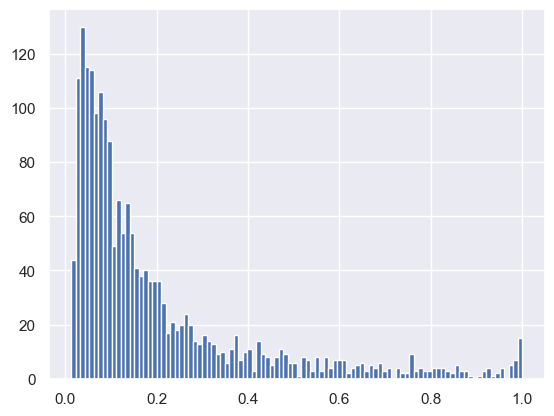

In [358]:
plt.hist(test_preds, bins=100)
plt.show()

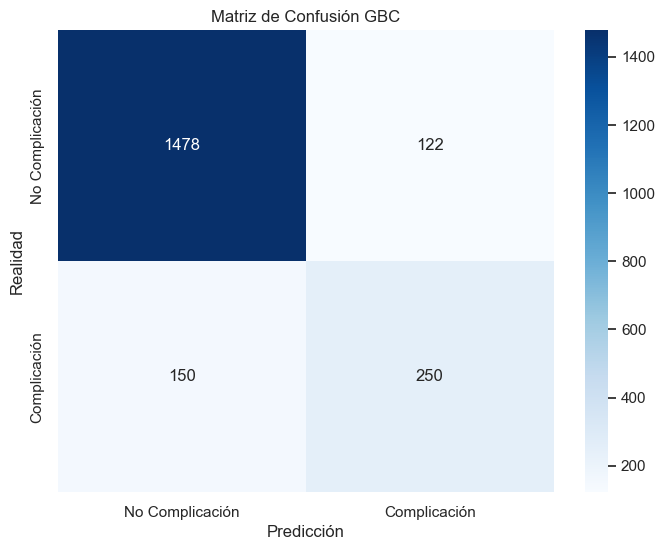

In [359]:
# Obtén las predicciones en el conjunto de prueba
y_pred = test_preds > best_th

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_val_balanced, y_pred)

# Define las etiquetas para la matriz de confusión
class_names = ['No Complicación', 'Complicación']

# Crea un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión GBC')
plt.show()

In [360]:
# Calcula el f1-score para cada clase
f1_score_no_complication = f1_score(y_val_balanced, y_pred, pos_label=0)
f1_score_complication = f1_score(y_val_balanced, y_pred, pos_label=1)

# Crea una tabla para mostrar los f1-scores
f1_score_table = pd.DataFrame({
    'Clase': ['No Complicación', 'Complicación'],
    'F1-Score': [f1_score_no_complication, f1_score_complication]
})

print(f1_score_table)

             Clase  F1-Score
0  No Complicación  0.915737
1     Complicación  0.647668


In [361]:
pipeline.fit(X, y)


Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'RIESGOS',
                                                                    'HOSPI_NO_QUIRURGICA',
                                                                    'SERVICIOS',
                                                                    'Antiguedad_paciente',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'GENERO',
                                                                    'AEI',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', LogisticRegression())])

In [362]:
test_df = pd.read_parquet("df_test.parquet")
submission_pred = pipeline.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_v7_2_LoRe.csv", index=False)

### **5.1 Gradient Boosting Classifier**

In [204]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, var_numericas_2),
        ("cat", categorical_transformer, var_categoricas_2),
    ]
)

In [205]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

data_pipeline = Pipeline(steps=[
    ("data_processor", preprocessor),
    #("pca", PCA()),
])

model_kwargs = dict(
        kernel = 'rbf',
        C = 1.0,
        #probability = True
    )

pipeline = add_model(data_pipeline, GradientBoostingClassifier()) ## SVC(**model_kwargs)
pipeline 

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'SERVICIOS',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', GradientBoostingClassifier())])

In [206]:
pipeline.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'SERVICIOS',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', GradientBoostingClassifier())])

In [207]:
## Guarda el pipeline entrenado usando el módulo 'pickle'
## Este archivo puede ser cargado posteriormente para usar el modelo entrenado sin tener que volver a entrenarlo
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [210]:
##Hacer predicciones en los conjuntos de datos de prueba y entrenamiento
test_preds = pipeline.predict(X_val_balanced) ##predecir las etiquetas para el conjunto de datos de prueba
train_preds = pipeline.predict(X_train_balanced) ##predecir las etiquetas para el conjunto de datos de entrenamiento

In [211]:
##cuenta la ocurrencia de cada valor único en la serie
pd.DataFrame(test_preds).value_counts()


0    1630
1     370
dtype: int64

In [212]:
##Calcula el mejor umbral para la clasifiación utilizando el F1-Score en el conjunto de prueba
test_preds = pipeline.predict_proba(X_val_balanced)[:, 1] #predice las probabilidades de pertenecer a la clase positiva (1) en el conjunto de prueba
train_preds = pipeline.predict_proba(X_train_balanced)[:, 1]
ths = np.linspace(0, 1, 1000) ##genera 1000 valores de umbral entre 0 y 1 para probar.
best_th = ths[np.argmax([f1_score(y_val_balanced, test_preds>th) for th in ths])] #calcula el puntaje F1 para cada umbral en ths
best_th #encuentra el umbral que maximiza el puntaje F1 y lo almacena en best_th.
##Este proceso ayuda a encontrar un umbral óptimo para convertir las probabilidades en predicciones binarias, maximizando el rendimiento del modelo en términos de F1-score.

0.1881881881881882

In [214]:
test_f1 = f1_score(y_val_balanced, test_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de prueba
train_f1 = f1_score(y_train_balanced, train_preds>best_th) #calcula el puntaje F1 en el conjunto de datos de entrenamiento
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.973248407643312
Test f1: 0.9598965071151357


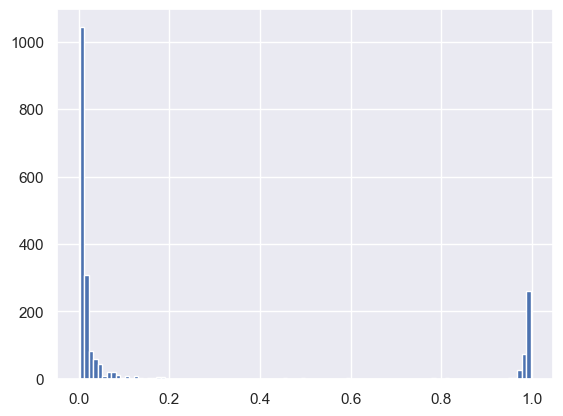

In [215]:
plt.hist(test_preds, bins=100)
plt.show()

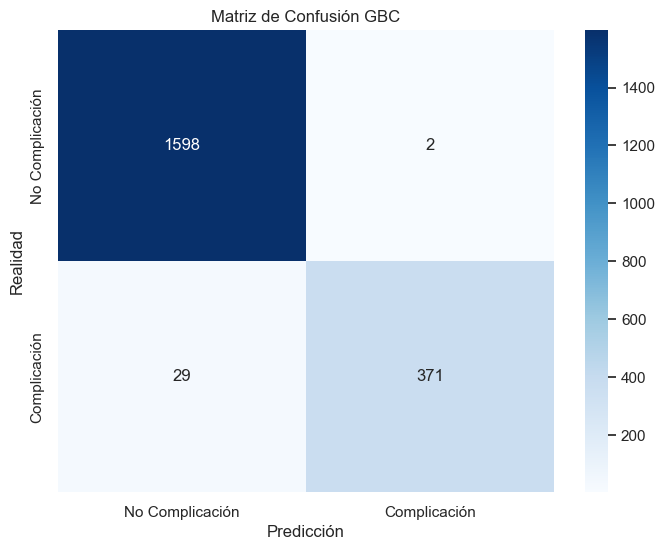

In [216]:
# Obtén las predicciones en el conjunto de prueba
y_pred = test_preds > best_th

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_val_balanced, y_pred)

# Define las etiquetas para la matriz de confusión
class_names = ['No Complicación', 'Complicación']

# Crea un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión GBC')
plt.show()

In [218]:
# Calcula el f1-score para cada clase
f1_score_no_complication = f1_score(y_val_balanced, y_pred, pos_label=0)
f1_score_complication = f1_score(y_val_balanced, y_pred, pos_label=1)

# Crea una tabla para mostrar los f1-scores
f1_score_table = pd.DataFrame({
    'Clase': ['No Complicación', 'Complicación'],
    'F1-Score': [f1_score_no_complication, f1_score_complication]
})

print(f1_score_table)

             Clase  F1-Score
0  No Complicación  0.990394
1     Complicación  0.959897


In [219]:
pipeline.fit(X, y)


Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'SERVICIOS',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model', GradientBoostingClassifier())])

In [220]:
## Submision
test_df = pd.read_parquet("df_test.parquet")
submission_pred = pipeline.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_v7_4_GBC.csv", index=False)

### **5.3. SVM + Optimización Bayesiana:**

In [151]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

In [170]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):
    """
    Función para mostrar en tiempo real el progreso de la optmización bayesiana.
    """
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:] 
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [318]:
data = collections.defaultdict(list)

def train_and_evaluate(
    # Data 
    scaler_choice,
    imputer_strategy,
    knn_imputer,
    knn_imputer_k,
    

    #Lasso
    alpha_lasso,

    #Modelo SVC
    SVC_C,
    SVC_gamma,
    kernel_SVC='linear',
    show_live_plot=True
    

) -> float:
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if knn_imputer > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)
    
    numeric_transformer = Pipeline(
        steps=[("imputer", imputer), 
               ("scaler", scaler_cls()),
              ]
    )
    
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas_2),
            ("cat", categorical_transformer, var_categoricas_2),
        ]
    )
    
    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),
    ])
           
    #Model SVM
    model = SVC(C=SVC_C, gamma=SVC_gamma, kernel=kernel_SVC, probability=True)
    pipeline = add_model(data_pipeline, model)
    

    ## Training protocol
    kf = KFold(n_splits=3, random_state=963, shuffle=True)
    
    train_fold_metrics = [] 
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train_balanced)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
        ky_train, ky_val = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)
        
        val_preds = pipeline.predict_proba(kX_val)[:, 1]
               
        train_preds = pipeline.predict_proba(kX_train)[:, 1]
        
        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th
        
        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)
        
        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)            
    
    
    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)
    
    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)
    
    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()
    
    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)
    
    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result


In [319]:
pbounds = dict(
    # Data
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),
    knn_imputer=(0,1),
    knn_imputer_k=(3, 10),
    alpha_lasso=(0, 0.008),
    SVC_C=(0.001, 10),
    SVC_gamma=(0,5),
   
)

optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=963,
    verbose=2,
)


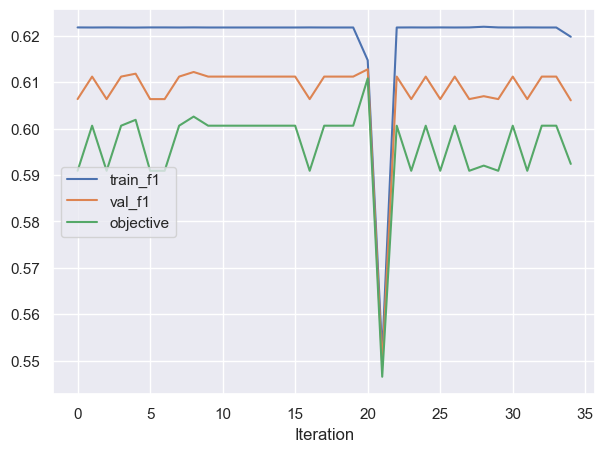

| 35        | 0.5924    | 6.333     | 4.653     | 0.007393  | 0.4853    | 0.3084    | 9.082     | 0.7905    |


In [320]:
#logger = JSONLogger(path="./logs.json")
#optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    n_iter=30,
)

In [330]:
optimizer.max["params"]

{'SVC_C': 0.9142616841327572,
 'SVC_gamma': 4.110818695751023,
 'alpha_lasso': 0.0,
 'imputer_strategy': 1.0,
 'knn_imputer': 0.06958622681087737,
 'knn_imputer_k': 9.53802660009597,
 'scaler_choice': 0.0}

In [331]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"], show_live_plot=False)

Validation F1 adjusted score: 0.6125313720760261
Train F1 adjusted score: 0.6217772690873977



In [332]:
test_preds = best_model.predict_proba(X_val_balanced)[:, 1]
roc_auc_score(y_val_balanced, test_preds)

0.8378093750000001

In [333]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [334]:
test_preds = best_model.predict_proba(X_val_balanced)[:, 1]
train_preds = best_model.predict_proba(X_train_balanced)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_val_balanced, test_preds>th) for th in ths])]
best_th

0.14014014014014015

In [335]:
test_f1 = f1_score(y_val_balanced, test_preds>best_th)
train_f1 = f1_score(y_train_balanced, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.6333333333333333
Test f1: 0.6588511137162953


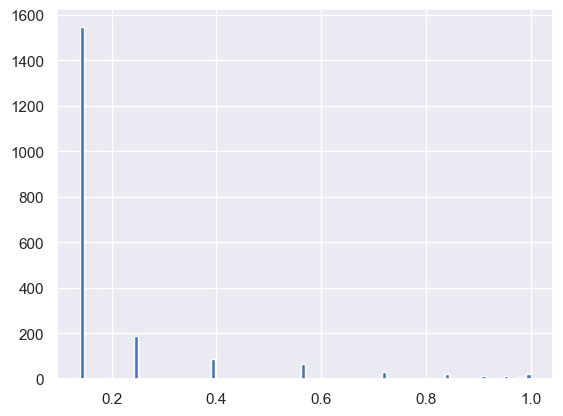

In [336]:
plt.hist(test_preds, bins=100)
plt.show()

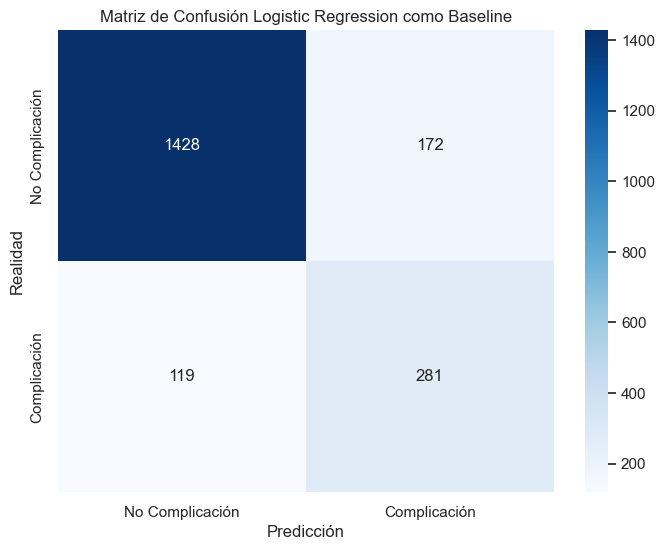

             Clase  F1-Score
0  No Complicación  0.907531
1     Complicación  0.658851


In [337]:
# Obtén las predicciones en el conjunto de prueba
y_pred = test_preds > best_th

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_val_balanced, y_pred)

# Define las etiquetas para la matriz de confusión
class_names = ['No Complicación', 'Complicación']

# Crea un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión Logistic Regression como Baseline')
plt.show()

# Calcula el f1-score para cada clase
f1_score_no_complication = f1_score(y_val_balanced, y_pred, pos_label=0)
f1_score_complication = f1_score(y_val_balanced, y_pred, pos_label=1)

# Crea una tabla para mostrar los f1-scores
f1_score_table = pd.DataFrame({
    'Clase': ['No Complicación', 'Complicación'],
    'F1-Score': [f1_score_no_complication, f1_score_complication]
})

print(f1_score_table)

In [324]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'SERVICIOS',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model',
                 SVC(C=0.9142616841327572, gamma=4.110818695751023,
                     kernel='linear', probability=True))])

In [338]:
test_df = pd.read_parquet("df_test.parquet")
submission_pred = best_model.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_SVC_v7_2.csv", index=False)

### **5.4. NN + Optimización Bayesiana**

In [292]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

In [293]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):
    """
    Función para mostrar en tiempo real el progreso de la optmización bayesiana.
    """
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:] 
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [294]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

data = collections.defaultdict(list)

def train_and_evaluate(
    # Data 
    scaler_choice,
    imputer_strategy,
    knn_imputer,
    knn_imputer_k,
    #pca_components,
    # Model
    model_hidden_layer_size_exp,
    model_lr_init,
    model_alpha,
    model_batch_size,
    model_max_iter,
    #model_solver,
    verbose=0,
    show_live_plot=True
) -> float:
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if knn_imputer > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)
        
    numeric_transformer = Pipeline(
        steps=[("imputer", imputer), 
               ("scaler", scaler_cls()),
               #("pca", PCA(n_components=int(pca_components))),
               #("LDA_feature",LDATransformer()) 
              ]
    )
    
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas_2),
            ("cat", categorical_transformer, var_categoricas_2),
        ]
    )
    
    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),
    ])
    
    ## Model configuration
    
    max_exponent = int(model_hidden_layer_size_exp)
    if max_exponent<2:
        max_exponent=2
        
    model_kwargs = dict(
        hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))], ### Arquitectura
        #solver="adam" if model_solver > 0.5 else "sgd",
        batch_size=2**int(model_batch_size), ## Back Propagation
        learning_rate_init=model_lr_init,## Back Propagation
        alpha=model_alpha,## Back Propagation
        max_iter=int(model_max_iter),
        early_stopping=True,
        random_state=42,
    )
    
    if verbose:
        print("MLP Classifier params: ")
        pprint(model_kwargs)
    
    model = MLPClassifier(**model_kwargs)
    
    pipeline = add_model(data_pipeline, model)
    
    ## Training protocol
    kf = KFold(n_splits=3, random_state=963, shuffle=True)
    
    train_fold_metrics = [] 
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train_balanced)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
        ky_train, ky_val = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)
        
        val_preds = pipeline.predict_proba(kX_val)[:, 1]
               
        train_preds = pipeline.predict_proba(kX_train)[:, 1]
        
        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th
        
        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)
        
        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)            
    
    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)
    
    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)
    
    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()
    
    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)
    
    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result

In [295]:
pbounds = dict(
    # Data
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),
    knn_imputer=(0,1),
    knn_imputer_k=(2, 10),
    #pca_components=(1, X_train[var_numericas].shape[1]),
    # Model
    #model_solver=(0, 1),
    model_hidden_layer_size_exp=(2, 4),
    model_lr_init=(0.005, 0.5),
    model_alpha=(0.001, 1),
    model_batch_size=(3, 7), # from 2**6=64 to 2**12=4096
    model_max_iter=(50, 50)
)

In [296]:
data_plot = collections.defaultdict(list)

In [297]:
optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=42,
    verbose=2,
)

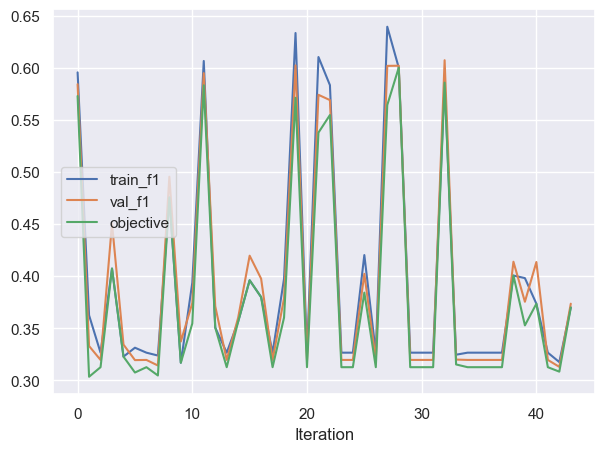

| 44        | 0.37      | 0.1035    | 0.5942    | 5.172     | 0.6346    | 5.554     | 3.124     | 0.4371    | 50.0      | 0.9936    |


In [299]:
#logger = JSONLogger(path="./logs.json")
#optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    init_points=2,
    n_iter=30,
)

In [300]:
optimizer.max["params"]

{'imputer_strategy': 0.12087156216444817,
 'knn_imputer': 0.1957402324316374,
 'knn_imputer_k': 8.242475169283448,
 'model_alpha': 0.04864457060607718,
 'model_batch_size': 5.80102170135471,
 'model_hidden_layer_size_exp': 3.52786776578671,
 'model_lr_init': 0.008369610419490229,
 'model_max_iter': 50.0,
 'scaler_choice': 0.7092410602490063}

In [301]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"], show_live_plot=False)

Validation F1 adjusted score: 0.6022031878492361
Train F1 adjusted score: 0.600346545460476



In [302]:
test_preds = best_model.predict_proba(X_val_balanced)[:, 1]
roc_auc_score(y_val_balanced, test_preds)

0.8589632812500001

In [304]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [305]:
test_preds = best_model.predict_proba(X_val_balanced)[:, 1]
train_preds = best_model.predict_proba(X_train_balanced)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_val_balanced, test_preds>th) for th in ths])]
best_th

0.08108108108108109

In [306]:
test_f1 = f1_score(y_val_balanced, test_preds>best_th)
train_f1 = f1_score(y_train_balanced, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.6413181242078579
Test f1: 0.686868686868687


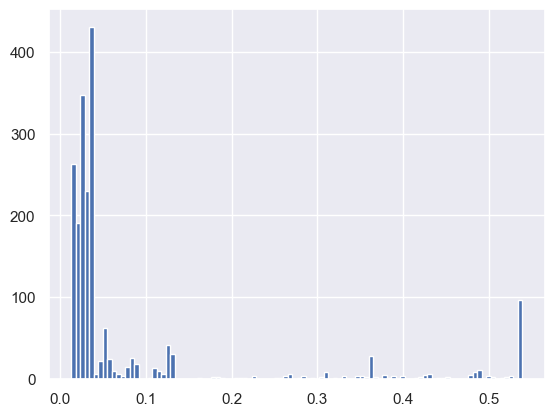

In [307]:
plt.hist(test_preds, bins=100)
plt.show()

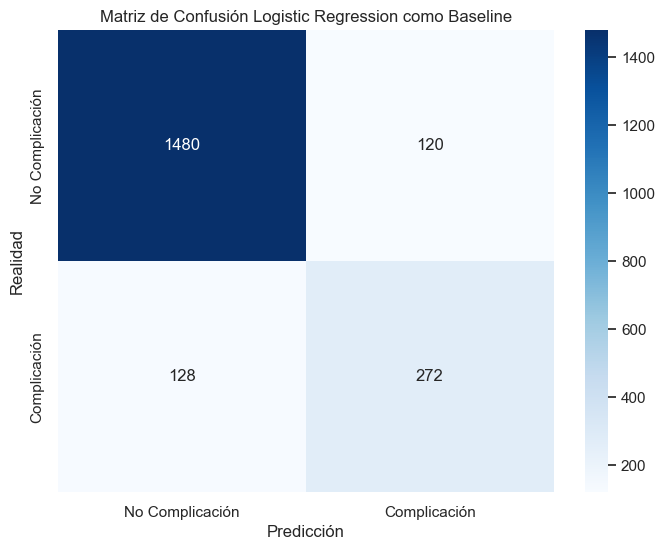

             Clase  F1-Score
0  No Complicación  0.922693
1     Complicación  0.686869


In [308]:
# Obtén las predicciones en el conjunto de prueba
y_pred = test_preds > best_th

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_val_balanced, y_pred)

# Define las etiquetas para la matriz de confusión
class_names = ['No Complicación', 'Complicación']

# Crea un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión Logistic Regression como Baseline')
plt.show()

# Calcula el f1-score para cada clase
f1_score_no_complication = f1_score(y_val_balanced, y_pred, pos_label=0)
f1_score_complication = f1_score(y_val_balanced, y_pred, pos_label=1)

# Crea una tabla para mostrar los f1-scores
f1_score_table = pd.DataFrame({
    'Clase': ['No Complicación', 'Complicación'],
    'F1-Score': [f1_score_no_complication, f1_score_complication]
})

print(f1_score_table)

In [303]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['IV_NIVEL',
                                                                    'SERVICIOS',
                                                                    'Tiempo_Ultima_cita']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['GRUPO_ETAREO',
                                                                    'COLESTEROL_TOTAL'])]))])),
                ('model',
                 MLPClassifier(alpha=0.04864457060607718, batch_size=32,
                               early_stopping=True, hidden_layer_sizes=[8, 4],
                               learning_rate_init=0.008369610419490229,
                               max_iter=50, random_state=42))])

In [309]:
test_df = pd.read_parquet("df_test.parquet")
submission_pred = best_model.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_NN_v7_1.csv", index=False)

### Conclusión:

A pesar de que los modelos de Redes Neuronales y SVC, prometían tener una precisión bastante buena para el modelo, la realidad fue que hubo modelos como el GradientBoostingClassifier, RadomForest, DecisionTree, con mejor desempeño a la hora de predecir los pacientes con complicaciones. 

Adicionalmente, en el EDA se encontró con variables que aparentemente podrían ser buenas para el modelo pero en realidad, se demostró que no eran importantes. El PCA como tal no mostró una mejora en los modelos, por ello se descartó su implementación ya que desmejoraba la predicción considerablemente en todos los modelos.

El mejor modelo para este caso fue el GradientBoostingClassifier con un F1-Score -> 
- 0:  No Complicación  0.990394
- 1:     Complicación  0.959897